# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Introduction

The project folder has the following structure:

* In the main directory you have this notebook, `cnn_from_scratch.ipynb`, that contains the instruction and some questions you will have to answer. Follow this notebook and complete the required sections in order.

* In the `src/` directory you have several source files. As instructed in this notebook, you will open and complete those files, then come back to this notebook to execute some tests that will verify what you have done. While these tests don't guarantee that your work is bug-free, they will help you finding the most obvious problems so you will be able to proceed to the next step with confidence.

* Sometimes you will need to restart the notebook. If you do so, remember to execute also the cells containing the code you have already completed starting from the top, before you move on.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. If you are using Jupyter Lab, you can use **File -> Export Notebook as -> Export Notebook to HTML**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

### Designing and training a CNN from scratch

In this notebook, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 50%.

Although 50% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="static_images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 50% is significantly better than random guessing, which would provide an accuracy of just 2% (100% / 50 classes). In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Experiment with different architectures, hyperparameters, training strategies, and trust your intuition.  And, of course, have fun!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly, download the data if you don't have it already, and also check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [3]:
# Pre-requisite: Select PyTorch 1.10 kernel

# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

In [5]:
import torch

print(torch.__version__)

1.10.2+cu113


In [6]:
import torchvision
print(torchvision.__version__)

0.11.3


In [7]:
import numpy

print(numpy.__version__)

1.22.2


In [8]:
import tqdm

print(tqdm.__version__)

4.62.3


In [9]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Data

In this and the following steps we are going to complete some code, and then execute some tests to make sure the code works as intended. 

Open the file `src/data.py`. It contains a function called `get_data_loaders`. Read the function and complete all the parts marked by `YOUR CODE HERE`. Once you have finished, test that your implementation is correct by executing the following cell (see below for what to do if a test fails):

In [10]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python3.8
cachedir: .pytest_cache
rootdir: /root/udacity-deeplearning/convolutional-neural-networks/project
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

=============================== warnings summary ===============================
../../../../opt/conda/lib/python3.8/site-packages/torchvision/io/image.py:11
  /opt/conda/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
    warn(f"Failed to load image Python extension: {e}")

src/data.py::test_data_loaders_output_type
src/data.py::test_data_loaders_

You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ``` 
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
> 
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> **Answer**: My code first resizes the image to 256 and then crops to 224. I picked 224 as the input size because it is the recommended input size for using pytorch's pre-trained models. I did decide to augment the dataset via RandAugment, a typical set of augmentations for natural images. I added this augmentation with the goal of improving my model's robustness, thus improving test accuracy.

### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch` in all places with the `YOUR CODE HERE` marker. After you're done, execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [11]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python3.8
cachedir: .pytest_cache
rootdir: /root/udacity-deeplearning/convolutional-neural-networks/project
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch ^C


We can now use the code we just completed to get a batch of images from your train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
[2023-05-06 21:41:49.056 pytorch-1-10-gpu-py-ml-g4dn-xlarge-53638dc8bb3d40f5ed7ac21aaf03:2436 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-05-06 21:41:49.197 pytorch-1-10-gpu-py-ml-g4dn-xlarge-53638dc8bb3d40f5ed7ac21aaf03:2436 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


/opt/conda/lib/python3.8/site-packages/smdebug-1.0.13b20220304-py3.8.egg/smdebug/profiler/system_metrics_reader.py:63: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/opt/conda/lib/python3.8/site-packages/smdebug-1.0.13b20220304-py3.8.egg/smdebug/profiler/system_metrics_reader.py:63: SyntaxWarning: "is not" with a literal. Did you mean "!="?


Reusing cached mean and std


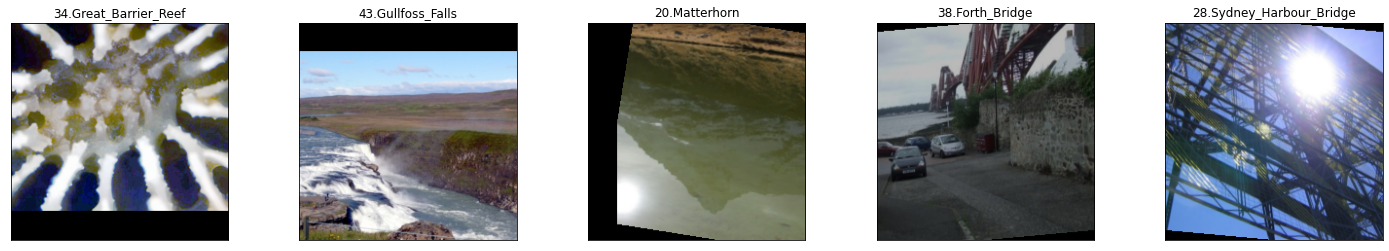

In [12]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders =  get_data_loaders(batch_size=5, valid_size=0.01, num_workers=-1) # YOUR CODE HERE

visualize_one_batch(data_loaders)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Define model

Open `src/model.py` and complete the `MyModel` class filling in all the `YOUR CODE HERE` sections. After you're done, execute the following test and make sure it passes:

In [13]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python3.8
cachedir: .pytest_cache
rootdir: /root/udacity-deeplearning/convolutional-neural-networks/project
collected 1 item                                                               

src/model.py::test_model_construction FAILED                             [100%]

=================================== FAILURES ===================================
___________________________ test_model_construction ____________________________

data_loaders = {'test': <torch.utils.data.dataloader.DataLoader object at 0x7f97d24668e0>, 'train': <torch.utils.data.dataloader.DataLoader object at 0x7f97d24666d0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f97d24667c0>}

    def test_model_construction(data_loaders):
    
        model = MyModel(num_classes=23, dropout=0.3)
    
        dataiter = iter(data_loaders["train"])
       

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question**: Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> __Answer:__ I decided to use 5 convolutional layers so that my model could be sufficiently expressive. I used dropout layers to reduce my model's tendency to overfit the training data. I made my model output a 50-dimensional vector to match with the 50 available landmark classes.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [14]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python3.8
cachedir: .pytest_cache
rootdir: /root/udacity-deeplearning/convolutional-neural-networks/project
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 1.01s ========================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [15]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python3.8
cachedir: .pytest_cache
rootdir: /root/udacity-deeplearning/convolutional-neural-networks/project
collecting ... ^C
collected 0 items / 1 error                                                    


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [ ]:
!pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python3.8
cachedir: .pytest_cache
rootdir: /root/udacity-deeplearning/convolutional-neural-networks/project
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch 

Now complete the `valid` function, then run the tests:

In [ ]:
!pytest -vv src/train.py -k valid_one_epoch

Now complete the `optimize` function, then run the tests:

In [ ]:
!pytest -vv src/train.py -k optimize

Finally, complete the `test` function then run the tests:

In [ ]:
!pytest -vv src/train.py -k one_epoch_test

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [3]:
# !pip install  sqlalchemy==2.0.0b4 optuna==2.10.1 | grep -v "already satisfied"

!pip install  sqlalchemy==2.0.0 optuna | grep -v "already satisfied"

In [5]:
batch_size = 2        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 35        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.4          # dropout for our model
learning_rate = 0.05  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
# opt = 'adam'            # optimizer. 'sgd' or 'adam'
momentum =0.9
weight_decay = 0.0     # regularization. Increase this to combat overfitting

In [ ]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel
import torch
from sqlalchemy import orm
import optuna
import torchvision.models as models

torch.cuda.empty_cache()

def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    # weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)
    # opt = trial.suggest_categorical('opt', ['adam', 'sgd'])
    momentum = trial.suggest_uniform('momentum', 0.1, 0.9)
    batch_size = trial.suggest_int('batch_size', 2, 128)

    print(f'Starting trial {trial.number}:\tHyperparameters={trial.params}') 
        
    # get the data loaders using batch_size and valid_size defined in the previous
    # cell
    # HINT: do NOT copy/paste the values. Use the variables instead
    data_loaders = get_data_loaders(batch_size=batch_size,  valid_size=valid_size) # YOUR CODE HERE

    print(f'train_loader size: {len(data_loaders["train"].dataset)}')
    print(f'val_loader size: {len(data_loaders["valid"].dataset)}')

    # print(data_loaders["train"]..dataset)
    # instance model MyModel with num_classes and drouput defined in the previous
    # cell
    # model = MyModel(num_classes, dropout) # YOUR CODE HERE

    # model = models.vgg16(pretrained=False, num_classes=num_classes)
    model = models.alexnet(pretrained=False, num_classes=num_classes)

    # Get the optimizer using get_optimizer and the model you just created, the learning rate,
    # the optimizer and the weight decay specified in the previous cell
    optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay) # YOUR CODE HERE

    # Get the loss using get_loss
    loss = get_loss() # YOUR CODE HERE

    valid_loss_min = optimize(
        data_loaders,
        model,
        optimizer,
        loss,
        n_epochs=num_epochs,
        save_path="checkpoints/best_val_loss.pt",
        interactive_tracking=False
    )
    
    return valid_loss_min
    
    
# Define study and optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Print best hyperparameters and validation accuracy
print('Best hyperparameters:', study.best_params)
print('Validation accuracy:', study.best_value)

/opt/conda/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
[I 2023-05-07 09:46:40,289] A new study created in memory with name: no-name-860fadb6-1e94-4049-96ea-1be20d0ece83


Starting trial 0:	Hyperparameters={'learning_rate': 0.002018253570962267, 'momentum': 0.4070668748044062, 'batch_size': 79}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017
[2023-05-07 09:46:44.373 pytorch-1-10-gpu-py-ml-g4dn-xlarge-53638dc8bb3d40f5ed7ac21aaf03:12248 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-05-07 09:46:44.522 pytorch-1-10-gpu-py-ml-g4dn-xlarge-53638dc8bb3d40f5ed7ac21aaf03:12248 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


/opt/conda/lib/python3.8/site-packages/smdebug-1.0.13b20220304-py3.8.egg/smdebug/profiler/system_metrics_reader.py:63: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/opt/conda/lib/python3.8/site-packages/smdebug-1.0.13b20220304-py3.8.egg/smdebug/profiler/system_metrics_reader.py:63: SyntaxWarning: "is not" with a literal. Did you mean "!="?
Training: 100%|█████████████████████████████████| 51/51 [00:22<00:00,  2.28it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.68it/s]


Validation Accuracy: 0.44%
Epoch: 1 	Training Loss2: 3.911987 	Validation Loss2: 3.912873
New minimum validation loss: 3.912873. Saving model ...


Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.40it/s]

Training Accuracy: 1.44%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.84it/s]

Validation Accuracy: 0.40%
Epoch: 2 	Training Loss2: 3.912011 	Validation Loss2: 3.912908



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.38it/s]

Training Accuracy: 1.44%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.87it/s]

Validation Accuracy: 0.38%
Epoch: 3 	Training Loss2: 3.911841 	Validation Loss2: 3.912920



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.36it/s]

Training Accuracy: 1.30%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.81it/s]

Validation Accuracy: 0.24%
Epoch: 4 	Training Loss2: 3.911989 	Validation Loss2: 3.912972



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.35it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.77it/s]

Validation Accuracy: 0.24%
Epoch: 5 	Training Loss2: 3.911781 	Validation Loss2: 3.913031



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.38it/s]

Training Accuracy: 1.47%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.83it/s]

Validation Accuracy: 0.22%
Epoch: 6 	Training Loss2: 3.911894 	Validation Loss2: 3.912987



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.37it/s]

Training Accuracy: 1.40%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.79it/s]

Validation Accuracy: 0.28%
Epoch: 7 	Training Loss2: 3.911858 	Validation Loss2: 3.913020
Epoch     7: reducing learning rate of group 0 to 2.0183e-04.



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.37it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.85it/s]

Validation Accuracy: 0.28%
Epoch: 8 	Training Loss2: 3.911838 	Validation Loss2: 3.913062



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.39it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.77it/s]

Validation Accuracy: 0.28%
Epoch: 9 	Training Loss2: 3.911936 	Validation Loss2: 3.913075



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.39it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.93it/s]

Validation Accuracy: 0.28%
Epoch: 10 	Training Loss2: 3.911855 	Validation Loss2: 3.913057



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.39it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.85it/s]

Validation Accuracy: 0.28%
Epoch: 11 	Training Loss2: 3.911899 	Validation Loss2: 3.912991



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.41it/s]

Training Accuracy: 1.32%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.88it/s]

Validation Accuracy: 0.28%
Epoch: 12 	Training Loss2: 3.911774 	Validation Loss2: 3.913071



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.40it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.86it/s]

Validation Accuracy: 0.28%
Epoch: 13 	Training Loss2: 3.911919 	Validation Loss2: 3.913087
Epoch    13: reducing learning rate of group 0 to 2.0183e-05.



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.41it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.86it/s]

Validation Accuracy: 0.28%
Epoch: 14 	Training Loss2: 3.911813 	Validation Loss2: 3.913064



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.40it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.86it/s]

Validation Accuracy: 0.28%
Epoch: 15 	Training Loss2: 3.911851 	Validation Loss2: 3.913024



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.42it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.86it/s]

Validation Accuracy: 0.28%
Epoch: 16 	Training Loss2: 3.911856 	Validation Loss2: 3.913004



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.38it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.80it/s]

Validation Accuracy: 0.28%
Epoch: 17 	Training Loss2: 3.911866 	Validation Loss2: 3.913037



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.36it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.84it/s]

Validation Accuracy: 0.28%
Epoch: 18 	Training Loss2: 3.911764 	Validation Loss2: 3.913034



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.37it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.80it/s]

Validation Accuracy: 0.28%
Epoch: 19 	Training Loss2: 3.911796 	Validation Loss2: 3.913067
Epoch    19: reducing learning rate of group 0 to 2.0183e-06.



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.37it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.82it/s]

Validation Accuracy: 0.28%
Epoch: 20 	Training Loss2: 3.911799 	Validation Loss2: 3.913072



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.40it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.81it/s]

Validation Accuracy: 0.28%
Epoch: 21 	Training Loss2: 3.911782 	Validation Loss2: 3.912992



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.40it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.79it/s]

Validation Accuracy: 0.28%
Epoch: 22 	Training Loss2: 3.911865 	Validation Loss2: 3.913043



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.41it/s]

Training Accuracy: 1.47%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.81it/s]

Validation Accuracy: 0.28%
Epoch: 23 	Training Loss2: 3.911861 	Validation Loss2: 3.913037



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.41it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.87it/s]

Validation Accuracy: 0.28%
Epoch: 24 	Training Loss2: 3.911902 	Validation Loss2: 3.913045



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.37it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.82it/s]

Validation Accuracy: 0.28%
Epoch: 25 	Training Loss2: 3.911703 	Validation Loss2: 3.913050
Epoch    25: reducing learning rate of group 0 to 2.0183e-07.



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.40it/s]

Training Accuracy: 1.89%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.86it/s]

Validation Accuracy: 0.28%
Epoch: 26 	Training Loss2: 3.911778 	Validation Loss2: 3.913057



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.36it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.87it/s]

Validation Accuracy: 0.28%
Epoch: 27 	Training Loss2: 3.911872 	Validation Loss2: 3.913041



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.37it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.90it/s]

Validation Accuracy: 0.28%
Epoch: 28 	Training Loss2: 3.911886 	Validation Loss2: 3.913051



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.38it/s]

Training Accuracy: 1.26%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.68it/s]

Validation Accuracy: 0.28%
Epoch: 29 	Training Loss2: 3.911935 	Validation Loss2: 3.913037



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.38it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.83it/s]

Validation Accuracy: 0.28%
Epoch: 30 	Training Loss2: 3.911734 	Validation Loss2: 3.913017



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.37it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.78it/s]

Validation Accuracy: 0.28%
Epoch: 31 	Training Loss2: 3.911917 	Validation Loss2: 3.913050
Epoch    31: reducing learning rate of group 0 to 2.0183e-08.



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.36it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.80it/s]

Validation Accuracy: 0.28%
Epoch: 32 	Training Loss2: 3.911896 	Validation Loss2: 3.913011



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.39it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.82it/s]

Validation Accuracy: 0.28%
Epoch: 33 	Training Loss2: 3.911690 	Validation Loss2: 3.913039



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.32it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.77it/s]

Validation Accuracy: 0.28%
Epoch: 34 	Training Loss2: 3.911843 	Validation Loss2: 3.913044



Training: 100%|█████████████████████████████████| 51/51 [00:21<00:00,  2.35it/s]

Training Accuracy: 1.47%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.73it/s]
[I 2023-05-07 10:02:16,544] Trial 0 finished with value: 3.9128731580880975 and parameters: {'learning_rate': 0.002018253570962267, 'momentum': 0.4070668748044062, 'batch_size': 79}. Best is trial 0 with value: 3.9128731580880975.


Validation Accuracy: 0.28%
Epoch: 35 	Training Loss2: 3.911948 	Validation Loss2: 3.913048
Starting trial 1:	Hyperparameters={'learning_rate': 0.00162311806908453, 'momentum': 0.33824694940804606, 'batch_size': 35}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.25it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.16it/s]


Validation Accuracy: 0.38%
Epoch: 1 	Training Loss2: 3.912160 	Validation Loss2: 3.911572
New minimum validation loss: 3.911572. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.34it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.40it/s]

Validation Accuracy: 0.38%
Epoch: 2 	Training Loss2: 3.912180 	Validation Loss2: 3.911738



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.33it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.53it/s]

Validation Accuracy: 0.38%
Epoch: 3 	Training Loss2: 3.912254 	Validation Loss2: 3.911759



Training: 100%|███████████████████████████████| 115/115 [00:22<00:00,  5.22it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.51it/s]

Validation Accuracy: 0.38%
Epoch: 4 	Training Loss2: 3.912163 	Validation Loss2: 3.911854



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.33it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.41it/s]

Validation Accuracy: 0.38%
Epoch: 5 	Training Loss2: 3.912091 	Validation Loss2: 3.911914



Training: 100%|███████████████████████████████| 115/115 [00:22<00:00,  5.23it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.47it/s]

Validation Accuracy: 0.40%
Epoch: 6 	Training Loss2: 3.911992 	Validation Loss2: 3.911934



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.31it/s]

Training Accuracy: 1.40%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.63it/s]

Validation Accuracy: 0.40%
Epoch: 7 	Training Loss2: 3.912038 	Validation Loss2: 3.912043
Epoch     7: reducing learning rate of group 0 to 1.6231e-04.



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.25it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.52it/s]

Validation Accuracy: 0.40%
Epoch: 8 	Training Loss2: 3.911920 	Validation Loss2: 3.912100



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.33it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.53it/s]

Validation Accuracy: 0.40%
Epoch: 9 	Training Loss2: 3.912019 	Validation Loss2: 3.912053



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.35it/s]

Training Accuracy: 1.69%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.59it/s]

Validation Accuracy: 0.40%
Epoch: 10 	Training Loss2: 3.911973 	Validation Loss2: 3.912112



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.29it/s]

Training Accuracy: 1.77%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.44it/s]

Validation Accuracy: 0.40%
Epoch: 11 	Training Loss2: 3.911921 	Validation Loss2: 3.912093



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.33it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.53it/s]

Validation Accuracy: 0.40%
Epoch: 12 	Training Loss2: 3.911895 	Validation Loss2: 3.912120



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.28it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.51it/s]

Validation Accuracy: 0.40%
Epoch: 13 	Training Loss2: 3.911871 	Validation Loss2: 3.912127
Epoch    13: reducing learning rate of group 0 to 1.6231e-05.



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.26it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.43it/s]

Validation Accuracy: 0.40%
Epoch: 14 	Training Loss2: 3.911919 	Validation Loss2: 3.912116



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.30it/s]

Training Accuracy: 1.47%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.63it/s]

Validation Accuracy: 0.40%
Epoch: 15 	Training Loss2: 3.911907 	Validation Loss2: 3.912077



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.39it/s]

Training Accuracy: 1.44%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.34it/s]

Validation Accuracy: 0.40%
Epoch: 16 	Training Loss2: 3.911911 	Validation Loss2: 3.912077



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.26it/s]

Training Accuracy: 1.26%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.48it/s]

Validation Accuracy: 0.40%
Epoch: 17 	Training Loss2: 3.911964 	Validation Loss2: 3.912071



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.24it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.66it/s]


Validation Accuracy: 0.40%
Epoch: 18 	Training Loss2: 3.911920 	Validation Loss2: 3.912112


Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.27it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.38it/s]

Validation Accuracy: 0.40%
Epoch: 19 	Training Loss2: 3.911946 	Validation Loss2: 3.912117
Epoch    19: reducing learning rate of group 0 to 1.6231e-06.



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.23it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.58it/s]

Validation Accuracy: 0.40%
Epoch: 20 	Training Loss2: 3.911925 	Validation Loss2: 3.912060



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.39it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.54it/s]

Validation Accuracy: 0.40%
Epoch: 21 	Training Loss2: 3.911943 	Validation Loss2: 3.912088



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.32it/s]

Training Accuracy: 1.40%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.72it/s]

Validation Accuracy: 0.40%
Epoch: 22 	Training Loss2: 3.911868 	Validation Loss2: 3.912129



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.37it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.59it/s]

Validation Accuracy: 0.40%
Epoch: 23 	Training Loss2: 3.911955 	Validation Loss2: 3.912101



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.33it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.74it/s]

Validation Accuracy: 0.40%
Epoch: 24 	Training Loss2: 3.911986 	Validation Loss2: 3.912068



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.33it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.53it/s]

Validation Accuracy: 0.40%
Epoch: 25 	Training Loss2: 3.911784 	Validation Loss2: 3.912098
Epoch    25: reducing learning rate of group 0 to 1.6231e-07.



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.31it/s]

Training Accuracy: 1.87%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.50it/s]

Validation Accuracy: 0.40%
Epoch: 26 	Training Loss2: 3.911981 	Validation Loss2: 3.912118



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.24it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.58it/s]

Validation Accuracy: 0.40%
Epoch: 27 	Training Loss2: 3.911888 	Validation Loss2: 3.912115



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.33it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.57it/s]

Validation Accuracy: 0.40%
Epoch: 28 	Training Loss2: 3.911921 	Validation Loss2: 3.912087



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.25it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.60it/s]

Validation Accuracy: 0.40%
Epoch: 29 	Training Loss2: 3.911950 	Validation Loss2: 3.912101



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.32it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.60it/s]

Validation Accuracy: 0.40%
Epoch: 30 	Training Loss2: 3.911926 	Validation Loss2: 3.912075



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.29it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.49it/s]

Validation Accuracy: 0.40%
Epoch: 31 	Training Loss2: 3.911848 	Validation Loss2: 3.912100
Epoch    31: reducing learning rate of group 0 to 1.6231e-08.



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.25it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.55it/s]

Validation Accuracy: 0.40%
Epoch: 32 	Training Loss2: 3.911915 	Validation Loss2: 3.912101



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.33it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.57it/s]

Validation Accuracy: 0.40%
Epoch: 33 	Training Loss2: 3.911871 	Validation Loss2: 3.912088



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.28it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.67it/s]

Validation Accuracy: 0.40%
Epoch: 34 	Training Loss2: 3.911960 	Validation Loss2: 3.912039



Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.29it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.58it/s]
[I 2023-05-07 10:17:52,178] Trial 1 finished with value: 3.9115722837119264 and parameters: {'learning_rate': 0.00162311806908453, 'momentum': 0.33824694940804606, 'batch_size': 35}. Best is trial 1 with value: 3.9115722837119264.


Validation Accuracy: 0.40%
Epoch: 35 	Training Loss2: 3.911945 	Validation Loss2: 3.912113
Starting trial 2:	Hyperparameters={'learning_rate': 1.282204121486368e-05, 'momentum': 0.3042698991691853, 'batch_size': 122}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.48it/s]

Training Accuracy: 1.55%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.98it/s]


Validation Accuracy: 0.66%
Epoch: 1 	Training Loss2: 3.912038 	Validation Loss2: 3.911600
New minimum validation loss: 3.911600. Saving model ...


Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.50it/s]

Training Accuracy: 1.69%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.01it/s]

Validation Accuracy: 0.66%
Epoch: 2 	Training Loss2: 3.912006 	Validation Loss2: 3.911700



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.50it/s]

Training Accuracy: 1.55%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.91it/s]

Validation Accuracy: 0.66%
Epoch: 3 	Training Loss2: 3.912093 	Validation Loss2: 3.911194



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.52it/s]

Training Accuracy: 1.63%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.99it/s]

Validation Accuracy: 0.66%
Epoch: 4 	Training Loss2: 3.912052 	Validation Loss2: 3.911829



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.49it/s]

Training Accuracy: 1.63%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.99it/s]

Validation Accuracy: 0.66%
Epoch: 5 	Training Loss2: 3.912014 	Validation Loss2: 3.911377



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.49it/s]

Training Accuracy: 1.79%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.03it/s]

Validation Accuracy: 0.66%
Epoch: 6 	Training Loss2: 3.912053 	Validation Loss2: 3.911918



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.50it/s]

Training Accuracy: 1.51%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.01it/s]

Validation Accuracy: 0.66%
Epoch: 7 	Training Loss2: 3.912019 	Validation Loss2: 3.912145
Epoch     7: reducing learning rate of group 0 to 1.2822e-06.



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.49it/s]

Training Accuracy: 1.57%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.01it/s]

Validation Accuracy: 0.66%
Epoch: 8 	Training Loss2: 3.912090 	Validation Loss2: 3.911924



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.50it/s]

Training Accuracy: 1.71%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.04it/s]

Validation Accuracy: 0.66%
Epoch: 9 	Training Loss2: 3.911926 	Validation Loss2: 3.911785



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.49it/s]

Training Accuracy: 1.55%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.97it/s]

Validation Accuracy: 0.66%
Epoch: 10 	Training Loss2: 3.912067 	Validation Loss2: 3.912059



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.50it/s]

Training Accuracy: 1.55%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.00it/s]

Validation Accuracy: 0.66%
Epoch: 11 	Training Loss2: 3.911993 	Validation Loss2: 3.911801



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.49it/s]

Training Accuracy: 1.63%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.96it/s]

Validation Accuracy: 0.66%
Epoch: 12 	Training Loss2: 3.911985 	Validation Loss2: 3.911674



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.48it/s]

Training Accuracy: 1.51%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.97it/s]

Validation Accuracy: 0.66%
Epoch: 13 	Training Loss2: 3.911973 	Validation Loss2: 3.911874
Epoch    13: reducing learning rate of group 0 to 1.2822e-07.



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.48it/s]

Training Accuracy: 1.75%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.98it/s]

Validation Accuracy: 0.66%
Epoch: 14 	Training Loss2: 3.911953 	Validation Loss2: 3.911915



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.50it/s]

Training Accuracy: 1.47%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.01it/s]

Validation Accuracy: 0.66%
Epoch: 15 	Training Loss2: 3.911966 	Validation Loss2: 3.911752



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.50it/s]

Training Accuracy: 1.67%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.03it/s]

Validation Accuracy: 0.66%
Epoch: 16 	Training Loss2: 3.912029 	Validation Loss2: 3.911863



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 1.85%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.02it/s]

Validation Accuracy: 0.66%
Epoch: 17 	Training Loss2: 3.912005 	Validation Loss2: 3.911811



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.50it/s]

Training Accuracy: 1.47%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.03it/s]

Validation Accuracy: 0.66%
Epoch: 18 	Training Loss2: 3.912180 	Validation Loss2: 3.911684



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.52it/s]

Training Accuracy: 1.36%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.66%
Epoch: 19 	Training Loss2: 3.912050 	Validation Loss2: 3.911963
Epoch    19: reducing learning rate of group 0 to 1.2822e-08.



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 1.55%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.03it/s]

Validation Accuracy: 0.66%
Epoch: 20 	Training Loss2: 3.911942 	Validation Loss2: 3.911719



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 1.47%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.97it/s]

Validation Accuracy: 0.66%
Epoch: 21 	Training Loss2: 3.912011 	Validation Loss2: 3.911652



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 1.49%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.95it/s]

Validation Accuracy: 0.66%
Epoch: 22 	Training Loss2: 3.912066 	Validation Loss2: 3.911906



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.50it/s]

Training Accuracy: 1.57%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.96it/s]

Validation Accuracy: 0.66%
Epoch: 23 	Training Loss2: 3.912014 	Validation Loss2: 3.911905



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.50it/s]

Training Accuracy: 1.49%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.02it/s]

Validation Accuracy: 0.66%
Epoch: 24 	Training Loss2: 3.911981 	Validation Loss2: 3.911720



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.52it/s]

Training Accuracy: 1.55%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.03it/s]

Validation Accuracy: 0.66%
Epoch: 25 	Training Loss2: 3.911993 	Validation Loss2: 3.911802
Epoch    25: reducing learning rate of group 0 to 1.2822e-09.



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.52it/s]

Training Accuracy: 2.11%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.03it/s]

Validation Accuracy: 0.66%
Epoch: 26 	Training Loss2: 3.912061 	Validation Loss2: 3.911699



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.49it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.01it/s]

Validation Accuracy: 0.66%
Epoch: 27 	Training Loss2: 3.911980 	Validation Loss2: 3.911723



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 1.26%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.90it/s]

Validation Accuracy: 0.66%
Epoch: 28 	Training Loss2: 3.912128 	Validation Loss2: 3.911717



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 1.59%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.02it/s]

Validation Accuracy: 0.66%
Epoch: 29 	Training Loss2: 3.912074 	Validation Loss2: 3.912012



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.52it/s]

Training Accuracy: 1.46%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.00it/s]

Validation Accuracy: 0.66%
Epoch: 30 	Training Loss2: 3.911886 	Validation Loss2: 3.911945



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.50it/s]

Training Accuracy: 1.47%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.02it/s]

Validation Accuracy: 0.66%
Epoch: 31 	Training Loss2: 3.912056 	Validation Loss2: 3.911699



Training: 100%|█████████████████████████████████| 33/33 [00:22<00:00,  1.49it/s]

Training Accuracy: 1.75%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.00it/s]

Validation Accuracy: 0.66%
Epoch: 32 	Training Loss2: 3.912043 	Validation Loss2: 3.911895



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 1.57%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.98it/s]

Validation Accuracy: 0.66%
Epoch: 33 	Training Loss2: 3.912018 	Validation Loss2: 3.911713



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 2.03%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.06it/s]

Validation Accuracy: 0.66%
Epoch: 34 	Training Loss2: 3.912014 	Validation Loss2: 3.911653



Training: 100%|█████████████████████████████████| 33/33 [00:21<00:00,  1.51it/s]

Training Accuracy: 1.51%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  2.03it/s]
[I 2023-05-07 10:33:40,243] Trial 2 finished with value: 3.911600033442179 and parameters: {'learning_rate': 1.282204121486368e-05, 'momentum': 0.3042698991691853, 'batch_size': 122}. Best is trial 1 with value: 3.9115722837119264.


Validation Accuracy: 0.66%
Epoch: 35 	Training Loss2: 3.911994 	Validation Loss2: 3.912042
Starting trial 3:	Hyperparameters={'learning_rate': 8.485273180355289e-05, 'momentum': 0.794576393419432, 'batch_size': 50}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.85it/s]

Training Accuracy: 1.40%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.81it/s]


Validation Accuracy: 0.34%
Epoch: 1 	Training Loss2: 3.912146 	Validation Loss2: 3.912157
New minimum validation loss: 3.912157. Saving model ...


Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.82it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.77it/s]

Validation Accuracy: 0.34%
Epoch: 2 	Training Loss2: 3.912173 	Validation Loss2: 3.912135



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.82it/s]

Training Accuracy: 1.42%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.79it/s]

Validation Accuracy: 0.32%
Epoch: 3 	Training Loss2: 3.912130 	Validation Loss2: 3.912210



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.76it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.85it/s]

Validation Accuracy: 0.34%
Epoch: 4 	Training Loss2: 3.912175 	Validation Loss2: 3.912244



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.81it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.88it/s]

Validation Accuracy: 0.34%
Epoch: 5 	Training Loss2: 3.912142 	Validation Loss2: 3.912204



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.80it/s]

Training Accuracy: 1.93%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.67it/s]

Validation Accuracy: 0.34%
Epoch: 6 	Training Loss2: 3.912106 	Validation Loss2: 3.912486



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.79it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.83it/s]

Validation Accuracy: 0.34%
Epoch: 7 	Training Loss2: 3.912033 	Validation Loss2: 3.912339
Epoch     7: reducing learning rate of group 0 to 8.4853e-06.



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.80it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.84it/s]

Validation Accuracy: 0.34%
Epoch: 8 	Training Loss2: 3.912031 	Validation Loss2: 3.912513



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.78it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.92it/s]

Validation Accuracy: 0.34%
Epoch: 9 	Training Loss2: 3.912095 	Validation Loss2: 3.912502



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.80it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.90it/s]

Validation Accuracy: 0.34%
Epoch: 10 	Training Loss2: 3.912089 	Validation Loss2: 3.912311



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.78it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.85it/s]

Validation Accuracy: 0.34%
Epoch: 11 	Training Loss2: 3.911967 	Validation Loss2: 3.912314



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.82it/s]

Training Accuracy: 1.69%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.93it/s]

Validation Accuracy: 0.34%
Epoch: 12 	Training Loss2: 3.911944 	Validation Loss2: 3.912617



Training: 100%|█████████████████████████████████| 81/81 [00:20<00:00,  3.86it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.92it/s]

Validation Accuracy: 0.34%
Epoch: 13 	Training Loss2: 3.912094 	Validation Loss2: 3.912865
Epoch    13: reducing learning rate of group 0 to 8.4853e-07.



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.84it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.88it/s]

Validation Accuracy: 0.34%
Epoch: 14 	Training Loss2: 3.912071 	Validation Loss2: 3.912493



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.81it/s]

Validation Accuracy: 0.34%
Epoch: 15 	Training Loss2: 3.912041 	Validation Loss2: 3.912786



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.77it/s]

Training Accuracy: 1.81%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.85it/s]

Validation Accuracy: 0.34%
Epoch: 16 	Training Loss2: 3.911891 	Validation Loss2: 3.912685



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.82it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.80it/s]

Validation Accuracy: 0.34%
Epoch: 17 	Training Loss2: 3.912068 	Validation Loss2: 3.912756



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.80it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.87it/s]

Validation Accuracy: 0.34%
Epoch: 18 	Training Loss2: 3.912149 	Validation Loss2: 3.912705



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.79it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.89it/s]

Validation Accuracy: 0.34%
Epoch: 19 	Training Loss2: 3.912066 	Validation Loss2: 3.912226
Epoch    19: reducing learning rate of group 0 to 8.4853e-08.



Training: 100%|█████████████████████████████████| 81/81 [00:20<00:00,  3.88it/s]

Training Accuracy: 1.44%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.87it/s]

Validation Accuracy: 0.34%
Epoch: 20 	Training Loss2: 3.912106 	Validation Loss2: 3.912831



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.84it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.84it/s]

Validation Accuracy: 0.34%
Epoch: 21 	Training Loss2: 3.912115 	Validation Loss2: 3.912349



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.85it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.98it/s]

Validation Accuracy: 0.34%
Epoch: 22 	Training Loss2: 3.912110 	Validation Loss2: 3.912153



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.83it/s]

Validation Accuracy: 0.34%
Epoch: 23 	Training Loss2: 3.912021 	Validation Loss2: 3.912148



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.82it/s]

Training Accuracy: 1.93%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.81it/s]

Validation Accuracy: 0.34%
Epoch: 24 	Training Loss2: 3.912019 	Validation Loss2: 3.912150



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.87it/s]

Validation Accuracy: 0.34%
Epoch: 25 	Training Loss2: 3.912144 	Validation Loss2: 3.912117
Epoch    25: reducing learning rate of group 0 to 8.4853e-09.



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.79it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.87it/s]

Validation Accuracy: 0.34%
Epoch: 26 	Training Loss2: 3.912141 	Validation Loss2: 3.912619



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.88it/s]

Validation Accuracy: 0.34%
Epoch: 27 	Training Loss2: 3.912107 	Validation Loss2: 3.912229



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.82it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.87it/s]

Validation Accuracy: 0.34%
Epoch: 28 	Training Loss2: 3.912052 	Validation Loss2: 3.912483



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  5.00it/s]

Validation Accuracy: 0.34%
Epoch: 29 	Training Loss2: 3.912189 	Validation Loss2: 3.912241



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.84it/s]

Training Accuracy: 1.99%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.77it/s]

Validation Accuracy: 0.34%
Epoch: 30 	Training Loss2: 3.911903 	Validation Loss2: 3.912273



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.86it/s]

Validation Accuracy: 0.34%
Epoch: 31 	Training Loss2: 3.912145 	Validation Loss2: 3.912730



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.78it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.87it/s]

Validation Accuracy: 0.34%
Epoch: 32 	Training Loss2: 3.912088 	Validation Loss2: 3.912643



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.78it/s]

Training Accuracy: 1.93%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.98it/s]

Validation Accuracy: 0.34%
Epoch: 33 	Training Loss2: 3.912149 	Validation Loss2: 3.912408



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.85it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.96it/s]

Validation Accuracy: 0.34%
Epoch: 34 	Training Loss2: 3.912130 	Validation Loss2: 3.912488



Training: 100%|█████████████████████████████████| 81/81 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.77it/s]
[I 2023-05-07 10:48:54,779] Trial 3 finished with value: 3.912157433373587 and parameters: {'learning_rate': 8.485273180355289e-05, 'momentum': 0.794576393419432, 'batch_size': 50}. Best is trial 1 with value: 3.9115722837119264.


Validation Accuracy: 0.34%
Epoch: 35 	Training Loss2: 3.912007 	Validation Loss2: 3.912566
Starting trial 4:	Hyperparameters={'learning_rate': 0.03371275783880616, 'momentum': 0.5531600111415746, 'batch_size': 64}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]

Training Accuracy: 1.18%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.69it/s]


Validation Accuracy: 0.48%
Epoch: 1 	Training Loss2: 3.912801 	Validation Loss2: 3.912134
New minimum validation loss: 3.912134. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.96it/s]


Training Accuracy: 1.57%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.71it/s]

Validation Accuracy: 0.48%
Epoch: 2 	Training Loss2: 3.912281 	Validation Loss2: 3.912719



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.90it/s]

Training Accuracy: 2.27%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.60it/s]

Validation Accuracy: 0.50%
Epoch: 3 	Training Loss2: 3.911535 	Validation Loss2: 3.912891



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.94it/s]


Training Accuracy: 2.03%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.56it/s]

Validation Accuracy: 0.40%
Epoch: 4 	Training Loss2: 3.910283 	Validation Loss2: 3.909038



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.89it/s]


Training Accuracy: 2.05%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.60it/s]

Validation Accuracy: 0.38%
Epoch: 5 	Training Loss2: 3.904196 	Validation Loss2: 3.894203



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]

Training Accuracy: 2.61%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.63it/s]


Validation Accuracy: 0.68%
Epoch: 6 	Training Loss2: 3.896382 	Validation Loss2: 3.872115
New minimum validation loss: 3.872115. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.94it/s]

Training Accuracy: 2.51%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.66it/s]

Validation Accuracy: 0.74%
Epoch: 7 	Training Loss2: 3.886401 	Validation Loss2: 3.851139
Epoch     7: reducing learning rate of group 0 to 3.3713e-03.



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.96it/s]

Training Accuracy: 2.99%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.58it/s]

Validation Accuracy: 0.78%
Epoch: 8 	Training Loss2: 3.870281 	Validation Loss2: 3.854114



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]

Training Accuracy: 2.99%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.64it/s]

Validation Accuracy: 0.84%
Epoch: 9 	Training Loss2: 3.870938 	Validation Loss2: 3.848889



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  3.00it/s]

Training Accuracy: 3.25%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.66it/s]

Validation Accuracy: 0.86%
Epoch: 10 	Training Loss2: 3.864425 	Validation Loss2: 3.845324



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]


Training Accuracy: 3.37%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.66it/s]

Validation Accuracy: 0.92%
Epoch: 11 	Training Loss2: 3.855972 	Validation Loss2: 3.841054



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.99it/s]

Training Accuracy: 3.81%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.74it/s]

Validation Accuracy: 1.16%
Epoch: 12 	Training Loss2: 3.859714 	Validation Loss2: 3.838294



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]


Training Accuracy: 3.65%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.63it/s]

Validation Accuracy: 1.10%
Epoch: 13 	Training Loss2: 3.855617 	Validation Loss2: 3.834053



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.98it/s]


Training Accuracy: 3.55%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.66it/s]


Validation Accuracy: 1.06%
Epoch: 14 	Training Loss2: 3.849964 	Validation Loss2: 3.830058
New minimum validation loss: 3.830058. Saving model ...
Epoch    14: reducing learning rate of group 0 to 3.3713e-04.


Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.98it/s]


Training Accuracy: 3.81%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.65it/s]

Validation Accuracy: 1.04%
Epoch: 15 	Training Loss2: 3.843912 	Validation Loss2: 3.822668



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.97it/s]


Training Accuracy: 3.57%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.73it/s]

Validation Accuracy: 1.04%
Epoch: 16 	Training Loss2: 3.843075 	Validation Loss2: 3.820431



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.96it/s]

Training Accuracy: 3.63%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.68it/s]

Validation Accuracy: 1.04%
Epoch: 17 	Training Loss2: 3.845445 	Validation Loss2: 3.817860



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]


Training Accuracy: 3.95%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.59it/s]

Validation Accuracy: 1.08%
Epoch: 18 	Training Loss2: 3.841679 	Validation Loss2: 3.817880



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.98it/s]


Training Accuracy: 3.89%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.65it/s]

Validation Accuracy: 1.04%
Epoch: 19 	Training Loss2: 3.845574 	Validation Loss2: 3.816332



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.99it/s]

Training Accuracy: 3.87%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.69it/s]

Validation Accuracy: 1.04%
Epoch: 20 	Training Loss2: 3.842822 	Validation Loss2: 3.816196
Epoch    20: reducing learning rate of group 0 to 3.3713e-05.



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.98it/s]

Training Accuracy: 3.57%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.69it/s]

Validation Accuracy: 1.04%
Epoch: 21 	Training Loss2: 3.841490 	Validation Loss2: 3.816449



Training: 100%|█████████████████████████████████| 63/63 [00:20<00:00,  3.01it/s]


Training Accuracy: 3.81%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.66it/s]


Validation Accuracy: 1.04%
Epoch: 22 	Training Loss2: 3.841812 	Validation Loss2: 3.814183


Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.94it/s]


Training Accuracy: 3.61%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.66it/s]

Validation Accuracy: 1.04%
Epoch: 23 	Training Loss2: 3.850307 	Validation Loss2: 3.814526



Training: 100%|█████████████████████████████████| 63/63 [00:20<00:00,  3.00it/s]

Training Accuracy: 3.97%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.68it/s]

Validation Accuracy: 1.02%
Epoch: 24 	Training Loss2: 3.839786 	Validation Loss2: 3.815131



Training: 100%|█████████████████████████████████| 63/63 [00:20<00:00,  3.00it/s]

Training Accuracy: 3.81%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.67it/s]

Validation Accuracy: 1.02%
Epoch: 25 	Training Loss2: 3.841056 	Validation Loss2: 3.814597



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]

Training Accuracy: 4.23%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.63it/s]

Validation Accuracy: 1.02%
Epoch: 26 	Training Loss2: 3.843189 	Validation Loss2: 3.813618
Epoch    26: reducing learning rate of group 0 to 3.3713e-06.



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.93it/s]


Training Accuracy: 3.83%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.65it/s]

Validation Accuracy: 1.02%
Epoch: 27 	Training Loss2: 3.842689 	Validation Loss2: 3.816451



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]

Training Accuracy: 3.73%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.66it/s]

Validation Accuracy: 1.02%
Epoch: 28 	Training Loss2: 3.844281 	Validation Loss2: 3.813702



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]

Training Accuracy: 3.65%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.70it/s]

Validation Accuracy: 1.02%
Epoch: 29 	Training Loss2: 3.841469 	Validation Loss2: 3.813201



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.97it/s]


Training Accuracy: 3.61%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.59it/s]

Validation Accuracy: 1.02%
Epoch: 30 	Training Loss2: 3.837814 	Validation Loss2: 3.814505



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.98it/s]

Training Accuracy: 3.63%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.66it/s]

Validation Accuracy: 1.02%
Epoch: 31 	Training Loss2: 3.847360 	Validation Loss2: 3.813863



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]

Training Accuracy: 3.53%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.69it/s]

Validation Accuracy: 1.02%
Epoch: 32 	Training Loss2: 3.837420 	Validation Loss2: 3.813561
Epoch    32: reducing learning rate of group 0 to 3.3713e-07.



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.95it/s]


Training Accuracy: 3.81%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.65it/s]

Validation Accuracy: 1.02%
Epoch: 33 	Training Loss2: 3.835821 	Validation Loss2: 3.813748



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.94it/s]

Training Accuracy: 4.09%



Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.68it/s]

Validation Accuracy: 1.02%
Epoch: 34 	Training Loss2: 3.839478 	Validation Loss2: 3.814390



Training: 100%|█████████████████████████████████| 63/63 [00:21<00:00,  2.96it/s]


Training Accuracy: 3.51%


Validating: 100%|███████████████████████████████| 16/16 [00:04<00:00,  3.60it/s]
[I 2023-05-07 11:04:24,904] Trial 4 finished with value: 3.8300575166940694 and parameters: {'learning_rate': 0.03371275783880616, 'momentum': 0.5531600111415746, 'batch_size': 64}. Best is trial 4 with value: 3.8300575166940694.


Validation Accuracy: 1.02%
Epoch: 35 	Training Loss2: 3.844769 	Validation Loss2: 3.815946
Starting trial 5:	Hyperparameters={'learning_rate': 0.018137770744357042, 'momentum': 0.33172608859841235, 'batch_size': 40}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.74it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.71it/s]


Validation Accuracy: 0.26%
Epoch: 1 	Training Loss2: 3.912481 	Validation Loss2: 3.912329
New minimum validation loss: 3.912329. Saving model ...


Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.70it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.72it/s]

Validation Accuracy: 0.26%
Epoch: 2 	Training Loss2: 3.912255 	Validation Loss2: 3.913308



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.74it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.68it/s]

Validation Accuracy: 0.26%
Epoch: 3 	Training Loss2: 3.911758 	Validation Loss2: 3.913956



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.71it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.86it/s]

Validation Accuracy: 0.26%
Epoch: 4 	Training Loss2: 3.911608 	Validation Loss2: 3.913809



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.70it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.75it/s]

Validation Accuracy: 0.26%
Epoch: 5 	Training Loss2: 3.911064 	Validation Loss2: 3.914185



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.70it/s]

Training Accuracy: 1.87%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.65it/s]

Validation Accuracy: 0.26%
Epoch: 6 	Training Loss2: 3.910830 	Validation Loss2: 3.914475



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.73it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.92it/s]

Validation Accuracy: 0.28%
Epoch: 7 	Training Loss2: 3.909671 	Validation Loss2: 3.913930
Epoch     7: reducing learning rate of group 0 to 1.8138e-03.



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.76it/s]

Training Accuracy: 1.89%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.78it/s]

Validation Accuracy: 0.34%
Epoch: 8 	Training Loss2: 3.908200 	Validation Loss2: 3.914208



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.70it/s]

Training Accuracy: 1.91%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.74it/s]

Validation Accuracy: 0.36%
Epoch: 9 	Training Loss2: 3.907735 	Validation Loss2: 3.912427



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.75it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.70it/s]

Validation Accuracy: 0.36%
Epoch: 10 	Training Loss2: 3.907120 	Validation Loss2: 3.913339



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.70it/s]

Training Accuracy: 1.81%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.68it/s]

Validation Accuracy: 0.38%
Epoch: 11 	Training Loss2: 3.907030 	Validation Loss2: 3.911508



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.70it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.78it/s]

Validation Accuracy: 0.46%
Epoch: 12 	Training Loss2: 3.906321 	Validation Loss2: 3.913799



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.71it/s]

Training Accuracy: 1.87%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.93it/s]

Validation Accuracy: 0.56%
Epoch: 13 	Training Loss2: 3.905922 	Validation Loss2: 3.911458
Epoch    13: reducing learning rate of group 0 to 1.8138e-04.



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.80it/s]

Training Accuracy: 1.77%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.92it/s]

Validation Accuracy: 0.56%
Epoch: 14 	Training Loss2: 3.905339 	Validation Loss2: 3.910932



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.78it/s]

Training Accuracy: 1.97%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.82it/s]

Validation Accuracy: 0.58%
Epoch: 15 	Training Loss2: 3.905402 	Validation Loss2: 3.910988



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.73it/s]

Training Accuracy: 1.91%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.89it/s]

Validation Accuracy: 0.58%
Epoch: 16 	Training Loss2: 3.905363 	Validation Loss2: 3.909478



Training: 100%|███████████████████████████████| 101/101 [00:20<00:00,  4.81it/s]

Training Accuracy: 2.25%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.73it/s]

Validation Accuracy: 0.56%
Epoch: 17 	Training Loss2: 3.904783 	Validation Loss2: 3.911425



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.65it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.68it/s]

Validation Accuracy: 0.54%
Epoch: 18 	Training Loss2: 3.905479 	Validation Loss2: 3.912613



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.69it/s]

Training Accuracy: 2.03%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.78it/s]

Validation Accuracy: 0.54%
Epoch: 19 	Training Loss2: 3.905709 	Validation Loss2: 3.910530
Epoch    19: reducing learning rate of group 0 to 1.8138e-05.



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.68it/s]

Training Accuracy: 1.89%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.57it/s]

Validation Accuracy: 0.54%
Epoch: 20 	Training Loss2: 3.904232 	Validation Loss2: 3.909784



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.71it/s]

Training Accuracy: 2.35%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.73it/s]

Validation Accuracy: 0.54%
Epoch: 21 	Training Loss2: 3.904881 	Validation Loss2: 3.912633



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.66it/s]

Training Accuracy: 2.29%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.75it/s]

Validation Accuracy: 0.52%
Epoch: 22 	Training Loss2: 3.904889 	Validation Loss2: 3.910568



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.76it/s]

Training Accuracy: 1.99%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.79it/s]

Validation Accuracy: 0.52%
Epoch: 23 	Training Loss2: 3.904945 	Validation Loss2: 3.910093



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.71it/s]

Training Accuracy: 2.03%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.75it/s]

Validation Accuracy: 0.52%
Epoch: 24 	Training Loss2: 3.904651 	Validation Loss2: 3.911189



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.68it/s]

Training Accuracy: 2.15%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.67it/s]

Validation Accuracy: 0.52%
Epoch: 25 	Training Loss2: 3.904572 	Validation Loss2: 3.911263
Epoch    25: reducing learning rate of group 0 to 1.8138e-06.



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.65it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.67it/s]

Validation Accuracy: 0.52%
Epoch: 26 	Training Loss2: 3.905205 	Validation Loss2: 3.909957



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.63it/s]

Training Accuracy: 1.95%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.70it/s]

Validation Accuracy: 0.52%
Epoch: 27 	Training Loss2: 3.904852 	Validation Loss2: 3.910350



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.68it/s]

Training Accuracy: 1.99%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.68it/s]

Validation Accuracy: 0.52%
Epoch: 28 	Training Loss2: 3.905095 	Validation Loss2: 3.911776



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.64it/s]

Training Accuracy: 2.07%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.74it/s]

Validation Accuracy: 0.52%
Epoch: 29 	Training Loss2: 3.905129 	Validation Loss2: 3.911046



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.74it/s]

Training Accuracy: 1.99%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.70it/s]

Validation Accuracy: 0.52%
Epoch: 30 	Training Loss2: 3.904494 	Validation Loss2: 3.911241



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.72it/s]

Training Accuracy: 2.01%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.79it/s]

Validation Accuracy: 0.52%
Epoch: 31 	Training Loss2: 3.904532 	Validation Loss2: 3.910775
Epoch    31: reducing learning rate of group 0 to 1.8138e-07.



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.64it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.64it/s]

Validation Accuracy: 0.52%
Epoch: 32 	Training Loss2: 3.904971 	Validation Loss2: 3.911133



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.69it/s]

Training Accuracy: 1.91%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.75it/s]

Validation Accuracy: 0.52%
Epoch: 33 	Training Loss2: 3.904979 	Validation Loss2: 3.912313



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.69it/s]

Training Accuracy: 2.07%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.64it/s]

Validation Accuracy: 0.52%
Epoch: 34 	Training Loss2: 3.904765 	Validation Loss2: 3.911217



Training: 100%|███████████████████████████████| 101/101 [00:21<00:00,  4.76it/s]

Training Accuracy: 1.91%



Validating: 100%|███████████████████████████████| 26/26 [00:04<00:00,  5.69it/s]
[I 2023-05-07 11:19:54,428] Trial 5 finished with value: 3.912328637563265 and parameters: {'learning_rate': 0.018137770744357042, 'momentum': 0.33172608859841235, 'batch_size': 40}. Best is trial 4 with value: 3.8300575166940694.


Validation Accuracy: 0.52%
Epoch: 35 	Training Loss2: 3.904789 	Validation Loss2: 3.912214
Starting trial 6:	Hyperparameters={'learning_rate': 0.0016030726847255047, 'momentum': 0.6895766361295854, 'batch_size': 89}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████████| 46/46 [00:22<00:00,  2.08it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.64it/s]


Validation Accuracy: 0.40%
Epoch: 1 	Training Loss2: 3.912130 	Validation Loss2: 3.912506
New minimum validation loss: 3.912506. Saving model ...


Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.12it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.61it/s]


Validation Accuracy: 0.42%
Epoch: 2 	Training Loss2: 3.912068 	Validation Loss2: 3.912402


Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.10it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.57it/s]

Validation Accuracy: 0.42%
Epoch: 3 	Training Loss2: 3.911904 	Validation Loss2: 3.912591



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.10it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.40%
Epoch: 4 	Training Loss2: 3.911957 	Validation Loss2: 3.912655



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.10it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.30%
Epoch: 5 	Training Loss2: 3.911971 	Validation Loss2: 3.912699



Training: 100%|█████████████████████████████████| 46/46 [00:22<00:00,  2.08it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.67it/s]

Validation Accuracy: 0.32%
Epoch: 6 	Training Loss2: 3.911880 	Validation Loss2: 3.912486



Training: 100%|█████████████████████████████████| 46/46 [00:22<00:00,  2.09it/s]

Training Accuracy: 1.44%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.63it/s]

Validation Accuracy: 0.34%
Epoch: 7 	Training Loss2: 3.911895 	Validation Loss2: 3.912626
Epoch     7: reducing learning rate of group 0 to 1.6031e-04.



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.12it/s]

Training Accuracy: 1.42%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]

Validation Accuracy: 0.34%
Epoch: 8 	Training Loss2: 3.911856 	Validation Loss2: 3.912941



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.12it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.65it/s]

Validation Accuracy: 0.30%
Epoch: 9 	Training Loss2: 3.911638 	Validation Loss2: 3.912738



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.11it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.20%
Epoch: 10 	Training Loss2: 3.912056 	Validation Loss2: 3.912585



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.10it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.67it/s]

Validation Accuracy: 0.20%
Epoch: 11 	Training Loss2: 3.911686 	Validation Loss2: 3.912925



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.11it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.18%
Epoch: 12 	Training Loss2: 3.911752 	Validation Loss2: 3.912723



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.10it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.62it/s]


Validation Accuracy: 0.14%
Epoch: 13 	Training Loss2: 3.911659 	Validation Loss2: 3.912664
Epoch    13: reducing learning rate of group 0 to 1.6031e-05.


Training: 100%|█████████████████████████████████| 46/46 [00:22<00:00,  2.09it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.14%
Epoch: 14 	Training Loss2: 3.911759 	Validation Loss2: 3.912864



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.11it/s]

Training Accuracy: 1.81%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]

Validation Accuracy: 0.14%
Epoch: 15 	Training Loss2: 3.911556 	Validation Loss2: 3.912477



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.15it/s]

Training Accuracy: 1.91%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.65it/s]

Validation Accuracy: 0.14%
Epoch: 16 	Training Loss2: 3.911678 	Validation Loss2: 3.912694



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.12it/s]

Training Accuracy: 1.99%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.14%
Epoch: 17 	Training Loss2: 3.911869 	Validation Loss2: 3.913050



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.11it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.14%
Epoch: 18 	Training Loss2: 3.911831 	Validation Loss2: 3.912934



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.11it/s]

Training Accuracy: 1.77%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.60it/s]

Validation Accuracy: 0.14%
Epoch: 19 	Training Loss2: 3.911751 	Validation Loss2: 3.912662
Epoch    19: reducing learning rate of group 0 to 1.6031e-06.



Training: 100%|█████████████████████████████████| 46/46 [00:22<00:00,  2.05it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.63it/s]

Validation Accuracy: 0.14%
Epoch: 20 	Training Loss2: 3.911710 	Validation Loss2: 3.912845



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.11it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.14%
Epoch: 21 	Training Loss2: 3.911633 	Validation Loss2: 3.912552



Training: 100%|█████████████████████████████████| 46/46 [00:22<00:00,  2.07it/s]

Training Accuracy: 1.99%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.63it/s]

Validation Accuracy: 0.14%
Epoch: 22 	Training Loss2: 3.911743 	Validation Loss2: 3.912877



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.09it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.14%
Epoch: 23 	Training Loss2: 3.911903 	Validation Loss2: 3.912761



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.10it/s]

Training Accuracy: 1.69%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.59it/s]

Validation Accuracy: 0.14%
Epoch: 24 	Training Loss2: 3.911716 	Validation Loss2: 3.912631



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.09it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.61it/s]

Validation Accuracy: 0.14%
Epoch: 25 	Training Loss2: 3.911763 	Validation Loss2: 3.912573
Epoch    25: reducing learning rate of group 0 to 1.6031e-07.



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.13it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.64it/s]

Validation Accuracy: 0.14%
Epoch: 26 	Training Loss2: 3.911661 	Validation Loss2: 3.912710



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.14it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.62it/s]

Validation Accuracy: 0.14%
Epoch: 27 	Training Loss2: 3.911906 	Validation Loss2: 3.912807



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.12it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.68it/s]

Validation Accuracy: 0.14%
Epoch: 28 	Training Loss2: 3.911639 	Validation Loss2: 3.912863



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.11it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.66it/s]

Validation Accuracy: 0.14%
Epoch: 29 	Training Loss2: 3.911749 	Validation Loss2: 3.912503



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.12it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]

Validation Accuracy: 0.14%
Epoch: 30 	Training Loss2: 3.911692 	Validation Loss2: 3.913039



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.14it/s]

Training Accuracy: 1.85%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.68it/s]

Validation Accuracy: 0.14%
Epoch: 31 	Training Loss2: 3.911734 	Validation Loss2: 3.912932
Epoch    31: reducing learning rate of group 0 to 1.6031e-08.



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.14it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]

Validation Accuracy: 0.14%
Epoch: 32 	Training Loss2: 3.911715 	Validation Loss2: 3.912934



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.16it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.69it/s]

Validation Accuracy: 0.14%
Epoch: 33 	Training Loss2: 3.911907 	Validation Loss2: 3.912833



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.14it/s]

Training Accuracy: 1.77%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]

Validation Accuracy: 0.14%
Epoch: 34 	Training Loss2: 3.911840 	Validation Loss2: 3.912853



Training: 100%|█████████████████████████████████| 46/46 [00:21<00:00,  2.13it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
[I 2023-05-07 11:35:36,737] Trial 6 finished with value: 3.912506103515625 and parameters: {'learning_rate': 0.0016030726847255047, 'momentum': 0.6895766361295854, 'batch_size': 89}. Best is trial 4 with value: 3.8300575166940694.


Validation Accuracy: 0.14%
Epoch: 35 	Training Loss2: 3.911985 	Validation Loss2: 3.912800
Starting trial 7:	Hyperparameters={'learning_rate': 0.0015629418986166286, 'momentum': 0.33286092601665096, 'batch_size': 118}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s]

Training Accuracy: 1.95%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]


Validation Accuracy: 0.48%
Epoch: 1 	Training Loss2: 3.911380 	Validation Loss2: 3.912474
New minimum validation loss: 3.912474. Saving model ...


Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 1.87%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 2 	Training Loss2: 3.911525 	Validation Loss2: 3.912561



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.60it/s]

Training Accuracy: 1.65%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 3 	Training Loss2: 3.912162 	Validation Loss2: 3.912448



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 1.67%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 4 	Training Loss2: 3.911623 	Validation Loss2: 3.912603



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.60it/s]

Training Accuracy: 1.59%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 5 	Training Loss2: 3.911563 	Validation Loss2: 3.912543



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.64it/s]

Training Accuracy: 1.89%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.98it/s]

Validation Accuracy: 0.36%
Epoch: 6 	Training Loss2: 3.912049 	Validation Loss2: 3.912806



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s]

Training Accuracy: 1.71%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 7 	Training Loss2: 3.911897 	Validation Loss2: 3.912806
Epoch     7: reducing learning rate of group 0 to 1.5629e-04.



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.62it/s]

Training Accuracy: 1.63%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.92it/s]

Validation Accuracy: 0.36%
Epoch: 8 	Training Loss2: 3.912281 	Validation Loss2: 3.912623



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.60it/s]

Training Accuracy: 1.69%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.92it/s]

Validation Accuracy: 0.36%
Epoch: 9 	Training Loss2: 3.911825 	Validation Loss2: 3.912739



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 1.71%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.92it/s]

Validation Accuracy: 0.36%
Epoch: 10 	Training Loss2: 3.912156 	Validation Loss2: 3.912718



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.64it/s]

Training Accuracy: 1.63%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.96it/s]

Validation Accuracy: 0.36%
Epoch: 11 	Training Loss2: 3.912231 	Validation Loss2: 3.912709



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s]

Training Accuracy: 2.01%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.92it/s]

Validation Accuracy: 0.36%
Epoch: 12 	Training Loss2: 3.911987 	Validation Loss2: 3.912665



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.60it/s]

Training Accuracy: 1.75%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.92it/s]

Validation Accuracy: 0.36%
Epoch: 13 	Training Loss2: 3.912447 	Validation Loss2: 3.912650
Epoch    13: reducing learning rate of group 0 to 1.5629e-05.



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.62it/s]

Training Accuracy: 1.77%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.93it/s]

Validation Accuracy: 0.36%
Epoch: 14 	Training Loss2: 3.911949 	Validation Loss2: 3.912682



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s]

Training Accuracy: 1.75%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.96it/s]

Validation Accuracy: 0.36%
Epoch: 15 	Training Loss2: 3.911827 	Validation Loss2: 3.912616



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 1.89%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.92it/s]

Validation Accuracy: 0.36%
Epoch: 16 	Training Loss2: 3.911963 	Validation Loss2: 3.912553



Training: 100%|█████████████████████████████████| 35/35 [00:22<00:00,  1.57it/s]

Training Accuracy: 1.73%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 17 	Training Loss2: 3.911973 	Validation Loss2: 3.912754



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s]

Training Accuracy: 1.79%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.95it/s]

Validation Accuracy: 0.36%
Epoch: 18 	Training Loss2: 3.912091 	Validation Loss2: 3.912682



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 1.79%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.90it/s]

Validation Accuracy: 0.36%
Epoch: 19 	Training Loss2: 3.912167 	Validation Loss2: 3.912682
Epoch    19: reducing learning rate of group 0 to 1.5629e-06.



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.60it/s]

Training Accuracy: 1.69%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.95it/s]

Validation Accuracy: 0.36%
Epoch: 20 	Training Loss2: 3.911905 	Validation Loss2: 3.912632



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s]

Training Accuracy: 1.71%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 21 	Training Loss2: 3.912282 	Validation Loss2: 3.912662



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 1.71%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.95it/s]

Validation Accuracy: 0.36%
Epoch: 22 	Training Loss2: 3.912012 	Validation Loss2: 3.912647



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.62it/s]

Training Accuracy: 1.81%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.96it/s]

Validation Accuracy: 0.36%
Epoch: 23 	Training Loss2: 3.911164 	Validation Loss2: 3.912630



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s]

Training Accuracy: 1.85%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.93it/s]

Validation Accuracy: 0.36%
Epoch: 24 	Training Loss2: 3.912304 	Validation Loss2: 3.912777



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.64it/s]

Training Accuracy: 1.65%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.91it/s]

Validation Accuracy: 0.36%
Epoch: 25 	Training Loss2: 3.911819 	Validation Loss2: 3.912701
Epoch    25: reducing learning rate of group 0 to 1.5629e-07.



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 2.07%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.92it/s]

Validation Accuracy: 0.36%
Epoch: 26 	Training Loss2: 3.912086 	Validation Loss2: 3.912683



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s]

Training Accuracy: 1.83%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 27 	Training Loss2: 3.911866 	Validation Loss2: 3.912698



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.62it/s]

Training Accuracy: 1.67%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.91it/s]

Validation Accuracy: 0.36%
Epoch: 28 	Training Loss2: 3.911793 	Validation Loss2: 3.912712



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.64it/s]

Training Accuracy: 1.49%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.96it/s]

Validation Accuracy: 0.36%
Epoch: 29 	Training Loss2: 3.911861 	Validation Loss2: 3.912488



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.64it/s]

Training Accuracy: 1.55%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.98it/s]

Validation Accuracy: 0.36%
Epoch: 30 	Training Loss2: 3.911952 	Validation Loss2: 3.912724



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.62it/s]

Training Accuracy: 1.61%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.93it/s]

Validation Accuracy: 0.36%
Epoch: 31 	Training Loss2: 3.911899 	Validation Loss2: 3.912596
Epoch    31: reducing learning rate of group 0 to 1.5629e-08.



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 1.73%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 32 	Training Loss2: 3.911949 	Validation Loss2: 3.912662



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]

Training Accuracy: 1.73%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.96it/s]

Validation Accuracy: 0.36%
Epoch: 33 	Training Loss2: 3.911954 	Validation Loss2: 3.912699



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.62it/s]

Training Accuracy: 1.85%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]

Validation Accuracy: 0.36%
Epoch: 34 	Training Loss2: 3.912020 	Validation Loss2: 3.912712



Training: 100%|█████████████████████████████████| 35/35 [00:21<00:00,  1.62it/s]

Training Accuracy: 1.99%



Validating: 100%|█████████████████████████████████| 9/9 [00:04<00:00,  1.93it/s]
[I 2023-05-07 11:51:17,057] Trial 7 finished with value: 3.9124736520979138 and parameters: {'learning_rate': 0.0015629418986166286, 'momentum': 0.33286092601665096, 'batch_size': 118}. Best is trial 4 with value: 3.8300575166940694.


Validation Accuracy: 0.36%
Epoch: 35 	Training Loss2: 3.911351 	Validation Loss2: 3.912576
Starting trial 8:	Hyperparameters={'learning_rate': 0.0002564040391779342, 'momentum': 0.4045757099239492, 'batch_size': 49}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.88it/s]


Validation Accuracy: 0.50%
Epoch: 1 	Training Loss2: 3.911926 	Validation Loss2: 3.912426
New minimum validation loss: 3.912426. Saving model ...


Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.84it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.70it/s]

Validation Accuracy: 0.50%
Epoch: 2 	Training Loss2: 3.911846 	Validation Loss2: 3.912450



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.85it/s]

Training Accuracy: 1.81%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.78it/s]

Validation Accuracy: 0.48%
Epoch: 3 	Training Loss2: 3.911795 	Validation Loss2: 3.912391



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.85it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.81it/s]

Validation Accuracy: 0.50%
Epoch: 4 	Training Loss2: 3.911972 	Validation Loss2: 3.912450



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.80it/s]

Validation Accuracy: 0.48%
Epoch: 5 	Training Loss2: 3.911973 	Validation Loss2: 3.912413



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.87it/s]

Training Accuracy: 1.87%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.72it/s]

Validation Accuracy: 0.46%
Epoch: 6 	Training Loss2: 3.911872 	Validation Loss2: 3.912489



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.84it/s]

Training Accuracy: 1.95%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.70it/s]

Validation Accuracy: 0.48%
Epoch: 7 	Training Loss2: 3.911822 	Validation Loss2: 3.912443
Epoch     7: reducing learning rate of group 0 to 2.5640e-05.



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.81it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.71it/s]

Validation Accuracy: 0.48%
Epoch: 8 	Training Loss2: 3.911850 	Validation Loss2: 3.912427



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.88it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.78it/s]

Validation Accuracy: 0.48%
Epoch: 9 	Training Loss2: 3.911892 	Validation Loss2: 3.912532



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.88it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.84it/s]

Validation Accuracy: 0.48%
Epoch: 10 	Training Loss2: 3.911877 	Validation Loss2: 3.912498



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.83it/s]

Validation Accuracy: 0.48%
Epoch: 11 	Training Loss2: 3.911772 	Validation Loss2: 3.912409



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.90it/s]

Training Accuracy: 1.93%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.82it/s]

Validation Accuracy: 0.48%
Epoch: 12 	Training Loss2: 3.911909 	Validation Loss2: 3.912560



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.90it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.74it/s]

Validation Accuracy: 0.48%
Epoch: 13 	Training Loss2: 3.911868 	Validation Loss2: 3.912379
Epoch    13: reducing learning rate of group 0 to 2.5640e-06.



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.89it/s]

Validation Accuracy: 0.48%
Epoch: 14 	Training Loss2: 3.911809 	Validation Loss2: 3.912454



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.90it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.79it/s]

Validation Accuracy: 0.48%
Epoch: 15 	Training Loss2: 3.911923 	Validation Loss2: 3.912500



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.89it/s]

Training Accuracy: 1.97%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.89it/s]

Validation Accuracy: 0.48%
Epoch: 16 	Training Loss2: 3.911898 	Validation Loss2: 3.912549



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.88it/s]

Training Accuracy: 1.67%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.79it/s]

Validation Accuracy: 0.48%
Epoch: 17 	Training Loss2: 3.911958 	Validation Loss2: 3.912413



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.89it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.81it/s]

Validation Accuracy: 0.48%
Epoch: 18 	Training Loss2: 3.911975 	Validation Loss2: 3.912421



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.89it/s]

Training Accuracy: 1.95%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.77it/s]

Validation Accuracy: 0.48%
Epoch: 19 	Training Loss2: 3.911870 	Validation Loss2: 3.912451
Epoch    19: reducing learning rate of group 0 to 2.5640e-07.



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.81it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.79it/s]

Validation Accuracy: 0.48%
Epoch: 20 	Training Loss2: 3.911876 	Validation Loss2: 3.912433



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.85it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.74it/s]

Validation Accuracy: 0.48%
Epoch: 21 	Training Loss2: 3.911976 	Validation Loss2: 3.912486



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.77%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.78it/s]

Validation Accuracy: 0.48%
Epoch: 22 	Training Loss2: 3.911908 	Validation Loss2: 3.912576



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.88it/s]

Training Accuracy: 1.97%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.76it/s]

Validation Accuracy: 0.48%
Epoch: 23 	Training Loss2: 3.911942 	Validation Loss2: 3.912454



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.84it/s]

Training Accuracy: 1.89%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.98it/s]

Validation Accuracy: 0.48%
Epoch: 24 	Training Loss2: 3.911994 	Validation Loss2: 3.912429



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.82it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.72it/s]

Validation Accuracy: 0.48%
Epoch: 25 	Training Loss2: 3.911872 	Validation Loss2: 3.912553
Epoch    25: reducing learning rate of group 0 to 2.5640e-08.



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.89it/s]

Training Accuracy: 1.87%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.85it/s]

Validation Accuracy: 0.48%
Epoch: 26 	Training Loss2: 3.911908 	Validation Loss2: 3.912391



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.69%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.80it/s]

Validation Accuracy: 0.48%
Epoch: 27 	Training Loss2: 3.911929 	Validation Loss2: 3.912526



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.85it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.81it/s]

Validation Accuracy: 0.48%
Epoch: 28 	Training Loss2: 3.911805 	Validation Loss2: 3.912476



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.93%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.83it/s]

Validation Accuracy: 0.48%
Epoch: 29 	Training Loss2: 3.911885 	Validation Loss2: 3.912466



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.79it/s]

Validation Accuracy: 0.48%
Epoch: 30 	Training Loss2: 3.911922 	Validation Loss2: 3.912475



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.87it/s]

Validation Accuracy: 0.48%
Epoch: 31 	Training Loss2: 3.911832 	Validation Loss2: 3.912504
Epoch    31: reducing learning rate of group 0 to 2.5640e-09.



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.83it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.72it/s]

Validation Accuracy: 0.48%
Epoch: 32 	Training Loss2: 3.911804 	Validation Loss2: 3.912479



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.89it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.74it/s]

Validation Accuracy: 0.48%
Epoch: 33 	Training Loss2: 3.911826 	Validation Loss2: 3.912481



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.86it/s]

Training Accuracy: 1.77%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.73it/s]

Validation Accuracy: 0.48%
Epoch: 34 	Training Loss2: 3.911847 	Validation Loss2: 3.912527



Training: 100%|█████████████████████████████████| 82/82 [00:21<00:00,  3.84it/s]

Training Accuracy: 1.87%



Validating: 100%|███████████████████████████████| 21/21 [00:04<00:00,  4.75it/s]
[I 2023-05-07 12:06:34,747] Trial 8 finished with value: 3.9124262559981573 and parameters: {'learning_rate': 0.0002564040391779342, 'momentum': 0.4045757099239492, 'batch_size': 49}. Best is trial 4 with value: 3.8300575166940694.


Validation Accuracy: 0.48%
Epoch: 35 	Training Loss2: 3.911778 	Validation Loss2: 3.912411
Starting trial 9:	Hyperparameters={'learning_rate': 0.0012356616936095785, 'momentum': 0.6495705438113166, 'batch_size': 60}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.18it/s]


Training Accuracy: 1.61%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.84it/s]


Validation Accuracy: 0.40%
Epoch: 1 	Training Loss2: 3.912238 	Validation Loss2: 3.912070
New minimum validation loss: 3.912070. Saving model ...


Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.19it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.76it/s]

Validation Accuracy: 0.40%
Epoch: 2 	Training Loss2: 3.912150 	Validation Loss2: 3.912141



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.14it/s]


Training Accuracy: 1.85%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.74it/s]

Validation Accuracy: 0.40%
Epoch: 3 	Training Loss2: 3.912052 	Validation Loss2: 3.912131



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.13it/s]


Training Accuracy: 1.49%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.72it/s]

Validation Accuracy: 0.44%
Epoch: 4 	Training Loss2: 3.912176 	Validation Loss2: 3.912144



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.13it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.74it/s]

Validation Accuracy: 0.44%
Epoch: 5 	Training Loss2: 3.911948 	Validation Loss2: 3.912170



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.16it/s]

Training Accuracy: 1.47%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.85it/s]

Validation Accuracy: 0.44%
Epoch: 6 	Training Loss2: 3.911953 	Validation Loss2: 3.912218



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.17it/s]


Training Accuracy: 1.57%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.76it/s]

Validation Accuracy: 0.46%
Epoch: 7 	Training Loss2: 3.912074 	Validation Loss2: 3.912221
Epoch     7: reducing learning rate of group 0 to 1.2357e-04.



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.15it/s]

Training Accuracy: 1.91%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.79it/s]

Validation Accuracy: 0.46%
Epoch: 8 	Training Loss2: 3.911836 	Validation Loss2: 3.912253



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.16it/s]


Training Accuracy: 1.40%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.67it/s]

Validation Accuracy: 0.46%
Epoch: 9 	Training Loss2: 3.911771 	Validation Loss2: 3.912241



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.15it/s]


Training Accuracy: 1.65%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.80it/s]

Validation Accuracy: 0.46%
Epoch: 10 	Training Loss2: 3.911789 	Validation Loss2: 3.912232



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.18it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.79it/s]

Validation Accuracy: 0.46%
Epoch: 11 	Training Loss2: 3.911935 	Validation Loss2: 3.912171



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.16it/s]


Training Accuracy: 1.53%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.83it/s]

Validation Accuracy: 0.46%
Epoch: 12 	Training Loss2: 3.911845 	Validation Loss2: 3.912244



Training: 100%|█████████████████████████████████| 67/67 [00:20<00:00,  3.19it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.83it/s]

Validation Accuracy: 0.46%
Epoch: 13 	Training Loss2: 3.912057 	Validation Loss2: 3.912251
Epoch    13: reducing learning rate of group 0 to 1.2357e-05.



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.14it/s]


Training Accuracy: 1.59%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.72it/s]

Validation Accuracy: 0.46%
Epoch: 14 	Training Loss2: 3.911954 	Validation Loss2: 3.912250



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.15it/s]

Training Accuracy: 1.87%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.79it/s]

Validation Accuracy: 0.46%
Epoch: 15 	Training Loss2: 3.911900 	Validation Loss2: 3.912262



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.14it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.79it/s]

Validation Accuracy: 0.46%
Epoch: 16 	Training Loss2: 3.911752 	Validation Loss2: 3.912247



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.15it/s]


Training Accuracy: 1.81%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.76it/s]

Validation Accuracy: 0.46%
Epoch: 17 	Training Loss2: 3.911918 	Validation Loss2: 3.912296



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.15it/s]


Training Accuracy: 1.91%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.72it/s]

Validation Accuracy: 0.46%
Epoch: 18 	Training Loss2: 3.911850 	Validation Loss2: 3.912273



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.18it/s]


Training Accuracy: 1.38%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.78it/s]

Validation Accuracy: 0.46%
Epoch: 19 	Training Loss2: 3.911930 	Validation Loss2: 3.912243
Epoch    19: reducing learning rate of group 0 to 1.2357e-06.



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.16it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.89it/s]

Validation Accuracy: 0.46%
Epoch: 20 	Training Loss2: 3.911972 	Validation Loss2: 3.912245



Training: 100%|█████████████████████████████████| 67/67 [00:20<00:00,  3.19it/s]

Training Accuracy: 1.97%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.77it/s]

Validation Accuracy: 0.46%
Epoch: 21 	Training Loss2: 3.911888 	Validation Loss2: 3.912242



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.14it/s]


Training Accuracy: 1.85%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.68it/s]

Validation Accuracy: 0.46%
Epoch: 22 	Training Loss2: 3.911889 	Validation Loss2: 3.912253



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.14it/s]


Training Accuracy: 1.51%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.80it/s]

Validation Accuracy: 0.46%
Epoch: 23 	Training Loss2: 3.911809 	Validation Loss2: 3.912272



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.14it/s]


Training Accuracy: 1.67%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.81it/s]

Validation Accuracy: 0.46%
Epoch: 24 	Training Loss2: 3.911850 	Validation Loss2: 3.912276



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.18it/s]


Training Accuracy: 1.69%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.89it/s]

Validation Accuracy: 0.46%
Epoch: 25 	Training Loss2: 3.911869 	Validation Loss2: 3.912274
Epoch    25: reducing learning rate of group 0 to 1.2357e-07.



Training: 100%|█████████████████████████████████| 67/67 [00:20<00:00,  3.20it/s]


Training Accuracy: 1.83%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.80it/s]

Validation Accuracy: 0.46%
Epoch: 26 	Training Loss2: 3.911919 	Validation Loss2: 3.912307



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.17it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.84it/s]

Validation Accuracy: 0.46%
Epoch: 27 	Training Loss2: 3.911943 	Validation Loss2: 3.912243



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.15it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.93it/s]

Validation Accuracy: 0.46%
Epoch: 28 	Training Loss2: 3.911881 	Validation Loss2: 3.912278



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.15it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.78it/s]

Validation Accuracy: 0.46%
Epoch: 29 	Training Loss2: 3.911869 	Validation Loss2: 3.912260



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.16it/s]

Training Accuracy: 1.47%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.79it/s]

Validation Accuracy: 0.46%
Epoch: 30 	Training Loss2: 3.911893 	Validation Loss2: 3.912232



Training: 100%|█████████████████████████████████| 67/67 [00:20<00:00,  3.22it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.83it/s]

Validation Accuracy: 0.46%
Epoch: 31 	Training Loss2: 3.911846 	Validation Loss2: 3.912207
Epoch    31: reducing learning rate of group 0 to 1.2357e-08.



Training: 100%|█████████████████████████████████| 67/67 [00:20<00:00,  3.20it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.86it/s]

Validation Accuracy: 0.46%
Epoch: 32 	Training Loss2: 3.911942 	Validation Loss2: 3.912265



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.13it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.85it/s]

Validation Accuracy: 0.46%
Epoch: 33 	Training Loss2: 3.911798 	Validation Loss2: 3.912213



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.17it/s]


Training Accuracy: 1.87%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.88it/s]

Validation Accuracy: 0.46%
Epoch: 34 	Training Loss2: 3.911881 	Validation Loss2: 3.912256



Training: 100%|█████████████████████████████████| 67/67 [00:21<00:00,  3.15it/s]


Training Accuracy: 1.51%


Validating: 100%|███████████████████████████████| 17/17 [00:04<00:00,  3.70it/s]
[I 2023-05-07 12:21:54,091] Trial 9 finished with value: 3.9120701621560485 and parameters: {'learning_rate': 0.0012356616936095785, 'momentum': 0.6495705438113166, 'batch_size': 60}. Best is trial 4 with value: 3.8300575166940694.


Validation Accuracy: 0.46%
Epoch: 35 	Training Loss2: 3.911916 	Validation Loss2: 3.912252
Starting trial 10:	Hyperparameters={'learning_rate': 0.09460800926528223, 'momentum': 0.13867169860992457, 'batch_size': 5}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.81it/s]

Training Accuracy: 1.30%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.75it/s]


Validation Accuracy: 0.38%
Epoch: 1 	Training Loss2: 3.919351 	Validation Loss2: 3.922645
New minimum validation loss: 3.922645. Saving model ...


Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.94it/s]

Training Accuracy: 1.79%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 42.81it/s]

Validation Accuracy: 0.38%
Epoch: 2 	Training Loss2: 3.919899 	Validation Loss2: 3.920323



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.80it/s]

Training Accuracy: 1.61%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 42.60it/s]

Validation Accuracy: 0.36%
Epoch: 3 	Training Loss2: 3.919744 	Validation Loss2: 3.924993



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.74it/s]

Training Accuracy: 1.85%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 42.61it/s]

Validation Accuracy: 0.36%
Epoch: 4 	Training Loss2: 3.922544 	Validation Loss2: 3.921925



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.29it/s]

Training Accuracy: 1.59%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 42.60it/s]


Validation Accuracy: 0.36%
Epoch: 5 	Training Loss2: 3.920126 	Validation Loss2: 3.922399


Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.22it/s]

Training Accuracy: 1.77%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 42.42it/s]

Validation Accuracy: 0.32%
Epoch: 6 	Training Loss2: 3.919047 	Validation Loss2: 3.923600



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.45it/s]

Training Accuracy: 1.67%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 42.57it/s]

Validation Accuracy: 0.32%
Epoch: 7 	Training Loss2: 3.920540 	Validation Loss2: 3.921042
Epoch     7: reducing learning rate of group 0 to 9.4608e-03.



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.54it/s]

Training Accuracy: 1.67%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.47it/s]

Validation Accuracy: 0.36%
Epoch: 8 	Training Loss2: 3.912459 	Validation Loss2: 3.921130



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.38it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 42.78it/s]

Validation Accuracy: 0.36%
Epoch: 9 	Training Loss2: 3.912212 	Validation Loss2: 3.921332



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.65it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.04it/s]

Validation Accuracy: 0.36%
Epoch: 10 	Training Loss2: 3.912034 	Validation Loss2: 3.921481



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.71it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.05it/s]

Validation Accuracy: 0.36%
Epoch: 11 	Training Loss2: 3.911947 	Validation Loss2: 3.921559



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.56it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 42.46it/s]

Validation Accuracy: 0.36%
Epoch: 12 	Training Loss2: 3.911826 	Validation Loss2: 3.921617



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.35it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 45.94it/s]

Validation Accuracy: 0.36%
Epoch: 13 	Training Loss2: 3.911762 	Validation Loss2: 3.921744
Epoch    13: reducing learning rate of group 0 to 9.4608e-04.



Training: 100%|███████████████████████████████| 803/803 [00:23<00:00, 33.82it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 46.82it/s]

Validation Accuracy: 0.36%
Epoch: 14 	Training Loss2: 3.910795 	Validation Loss2: 3.921702



Training: 100%|███████████████████████████████| 803/803 [00:23<00:00, 33.76it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 46.02it/s]

Validation Accuracy: 0.36%
Epoch: 15 	Training Loss2: 3.910796 	Validation Loss2: 3.921715



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 33.40it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 45.78it/s]

Validation Accuracy: 0.36%
Epoch: 16 	Training Loss2: 3.910775 	Validation Loss2: 3.921748



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 33.02it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 44.94it/s]

Validation Accuracy: 0.36%
Epoch: 17 	Training Loss2: 3.910765 	Validation Loss2: 3.921802



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 33.44it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 46.15it/s]

Validation Accuracy: 0.36%
Epoch: 18 	Training Loss2: 3.910775 	Validation Loss2: 3.921791



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 33.25it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 46.79it/s]

Validation Accuracy: 0.36%
Epoch: 19 	Training Loss2: 3.910762 	Validation Loss2: 3.921797
Epoch    19: reducing learning rate of group 0 to 9.4608e-05.



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 33.24it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 45.25it/s]

Validation Accuracy: 0.36%
Epoch: 20 	Training Loss2: 3.910659 	Validation Loss2: 3.921777



Training: 100%|███████████████████████████████| 803/803 [00:23<00:00, 33.52it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 45.18it/s]


Validation Accuracy: 0.36%
Epoch: 21 	Training Loss2: 3.910698 	Validation Loss2: 3.921767


Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.72it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 44.18it/s]

Validation Accuracy: 0.36%
Epoch: 22 	Training Loss2: 3.910653 	Validation Loss2: 3.921778



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.71it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.19it/s]

Validation Accuracy: 0.36%
Epoch: 23 	Training Loss2: 3.910689 	Validation Loss2: 3.921737



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.81it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 44.27it/s]

Validation Accuracy: 0.36%
Epoch: 24 	Training Loss2: 3.910687 	Validation Loss2: 3.921725



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.44it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.12it/s]

Validation Accuracy: 0.36%
Epoch: 25 	Training Loss2: 3.910629 	Validation Loss2: 3.921786
Epoch    25: reducing learning rate of group 0 to 9.4608e-06.



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.62it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 44.10it/s]

Validation Accuracy: 0.36%
Epoch: 26 	Training Loss2: 3.910630 	Validation Loss2: 3.921803



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.42it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 44.26it/s]

Validation Accuracy: 0.36%
Epoch: 27 	Training Loss2: 3.910656 	Validation Loss2: 3.921778



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.21it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.85it/s]

Validation Accuracy: 0.36%
Epoch: 28 	Training Loss2: 3.910657 	Validation Loss2: 3.921764



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.41it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 45.35it/s]

Validation Accuracy: 0.36%
Epoch: 29 	Training Loss2: 3.910646 	Validation Loss2: 3.921764



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.61it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 45.01it/s]

Validation Accuracy: 0.36%
Epoch: 30 	Training Loss2: 3.910672 	Validation Loss2: 3.921790



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.94it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 44.68it/s]

Validation Accuracy: 0.36%
Epoch: 31 	Training Loss2: 3.910663 	Validation Loss2: 3.921760
Epoch    31: reducing learning rate of group 0 to 9.4608e-07.



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 32.03it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 44.08it/s]

Validation Accuracy: 0.36%
Epoch: 32 	Training Loss2: 3.910636 	Validation Loss2: 3.921810



Training: 100%|███████████████████████████████| 803/803 [00:24<00:00, 32.16it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.68it/s]

Validation Accuracy: 0.36%
Epoch: 33 	Training Loss2: 3.910658 	Validation Loss2: 3.921761



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.70it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.39it/s]

Validation Accuracy: 0.36%
Epoch: 34 	Training Loss2: 3.910637 	Validation Loss2: 3.921785



Training: 100%|███████████████████████████████| 803/803 [00:25<00:00, 31.89it/s]

Training Accuracy: 1.91%



Validating: 100%|█████████████████████████████| 201/201 [00:04<00:00, 43.66it/s]
[I 2023-05-07 12:39:22,815] Trial 10 finished with value: 3.922644749209655 and parameters: {'learning_rate': 0.09460800926528223, 'momentum': 0.13867169860992457, 'batch_size': 5}. Best is trial 4 with value: 3.8300575166940694.


Validation Accuracy: 0.36%
Epoch: 35 	Training Loss2: 3.910631 	Validation Loss2: 3.921795
Starting trial 11:	Hyperparameters={'learning_rate': 0.015288973641754055, 'momentum': 0.5298009419098495, 'batch_size': 19}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.79it/s]

Training Accuracy: 1.36%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.28it/s]


Validation Accuracy: 0.40%
Epoch: 1 	Training Loss2: 3.913035 	Validation Loss2: 3.912999
New minimum validation loss: 3.912999. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.69it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 11.99it/s]

Validation Accuracy: 0.54%
Epoch: 2 	Training Loss2: 3.912371 	Validation Loss2: 3.913512



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.75it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 11.38it/s]

Validation Accuracy: 0.50%
Epoch: 3 	Training Loss2: 3.911361 	Validation Loss2: 3.912101



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.78it/s]

Training Accuracy: 1.85%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.20it/s]

Validation Accuracy: 0.46%
Epoch: 4 	Training Loss2: 3.907052 	Validation Loss2: 3.894342



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.68it/s]

Training Accuracy: 2.37%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.08it/s]


Validation Accuracy: 0.90%
Epoch: 5 	Training Loss2: 3.891404 	Validation Loss2: 3.825630
New minimum validation loss: 3.825630. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.76it/s]

Training Accuracy: 2.79%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.26it/s]

Validation Accuracy: 0.78%
Epoch: 6 	Training Loss2: 3.860294 	Validation Loss2: 3.791799



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.66it/s]

Training Accuracy: 3.25%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.46it/s]


Validation Accuracy: 0.66%
Epoch: 7 	Training Loss2: 3.826859 	Validation Loss2: 3.774758
New minimum validation loss: 3.774758. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.82it/s]

Training Accuracy: 3.47%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.21it/s]


Validation Accuracy: 0.96%
Epoch: 8 	Training Loss2: 3.798800 	Validation Loss2: 3.734945
New minimum validation loss: 3.734945. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.81it/s]

Training Accuracy: 4.09%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.08it/s]

Validation Accuracy: 1.06%
Epoch: 9 	Training Loss2: 3.789911 	Validation Loss2: 3.776543



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.84it/s]

Training Accuracy: 4.72%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.12it/s]


Validation Accuracy: 1.36%
Epoch: 10 	Training Loss2: 3.755123 	Validation Loss2: 3.697299
New minimum validation loss: 3.697299. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.78it/s]

Training Accuracy: 5.18%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.30it/s]

Validation Accuracy: 1.55%
Epoch: 11 	Training Loss2: 3.721695 	Validation Loss2: 3.697400



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.76it/s]

Training Accuracy: 5.22%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.54it/s]

Validation Accuracy: 1.42%
Epoch: 12 	Training Loss2: 3.717145 	Validation Loss2: 3.717811



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.80it/s]

Training Accuracy: 5.48%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.45it/s]


Validation Accuracy: 1.59%
Epoch: 13 	Training Loss2: 3.674451 	Validation Loss2: 3.648083
New minimum validation loss: 3.648083. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.80it/s]

Training Accuracy: 6.12%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.42it/s]


Validation Accuracy: 1.99%
Epoch: 14 	Training Loss2: 3.640983 	Validation Loss2: 3.574380
New minimum validation loss: 3.574380. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:22<00:00,  9.63it/s]

Training Accuracy: 6.88%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.06it/s]


Validation Accuracy: 2.07%
Epoch: 15 	Training Loss2: 3.607085 	Validation Loss2: 3.523813
New minimum validation loss: 3.523813. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.68it/s]

Training Accuracy: 7.43%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.13it/s]

Validation Accuracy: 2.25%
Epoch: 16 	Training Loss2: 3.565188 	Validation Loss2: 3.538598



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.75it/s]

Training Accuracy: 8.39%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.34it/s]

Validation Accuracy: 1.87%
Epoch: 17 	Training Loss2: 3.542703 	Validation Loss2: 3.568831



Training: 100%|███████████████████████████████| 212/212 [00:22<00:00,  9.62it/s]

Training Accuracy: 8.55%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.35it/s]


Validation Accuracy: 2.37%
Epoch: 18 	Training Loss2: 3.491272 	Validation Loss2: 3.466612
New minimum validation loss: 3.466612. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.80it/s]

Training Accuracy: 9.73%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.16it/s]


Validation Accuracy: 2.69%
Epoch: 19 	Training Loss2: 3.440844 	Validation Loss2: 3.383899
New minimum validation loss: 3.383899. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.74it/s]

Training Accuracy: 11.12%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.25it/s]


Validation Accuracy: 3.43%
Epoch: 20 	Training Loss2: 3.394978 	Validation Loss2: 3.209378
New minimum validation loss: 3.209378. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.71it/s]

Training Accuracy: 11.76%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.18it/s]


Validation Accuracy: 3.87%
Epoch: 21 	Training Loss2: 3.329906 	Validation Loss2: 3.156629
New minimum validation loss: 3.156629. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.70it/s]

Training Accuracy: 12.78%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.39it/s]

Validation Accuracy: 3.11%
Epoch: 22 	Training Loss2: 3.259820 	Validation Loss2: 3.246221



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.72it/s]

Training Accuracy: 14.41%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.19it/s]


Validation Accuracy: 4.35%
Epoch: 23 	Training Loss2: 3.206551 	Validation Loss2: 3.031860
New minimum validation loss: 3.031860. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.71it/s]

Training Accuracy: 14.45%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.11it/s]


Validation Accuracy: 4.46%
Epoch: 24 	Training Loss2: 3.142363 	Validation Loss2: 2.997791
New minimum validation loss: 2.997791. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:22<00:00,  9.63it/s]

Training Accuracy: 15.87%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.00it/s]

Validation Accuracy: 4.19%
Epoch: 25 	Training Loss2: 3.110831 	Validation Loss2: 3.007959



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.73it/s]

Training Accuracy: 15.79%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.36it/s]

Validation Accuracy: 4.92%
Epoch: 26 	Training Loss2: 3.071848 	Validation Loss2: 2.990595



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.79it/s]

Training Accuracy: 17.44%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.27it/s]

Validation Accuracy: 3.63%
Epoch: 27 	Training Loss2: 3.002691 	Validation Loss2: 3.354571



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.74it/s]

Training Accuracy: 18.14%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.06it/s]


Validation Accuracy: 5.08%
Epoch: 28 	Training Loss2: 2.974126 	Validation Loss2: 2.878308
New minimum validation loss: 2.878308. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.77it/s]

Training Accuracy: 19.21%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.31it/s]

Validation Accuracy: 3.79%
Epoch: 29 	Training Loss2: 2.912119 	Validation Loss2: 3.163044



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.81it/s]

Training Accuracy: 19.99%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.12it/s]


Validation Accuracy: 5.92%
Epoch: 30 	Training Loss2: 2.873161 	Validation Loss2: 2.786983
New minimum validation loss: 2.786983. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.88it/s]

Training Accuracy: 21.29%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.25it/s]

Validation Accuracy: 5.46%
Epoch: 31 	Training Loss2: 2.856026 	Validation Loss2: 2.762819



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.91it/s]

Training Accuracy: 21.39%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.24it/s]


Validation Accuracy: 6.14%
Epoch: 32 	Training Loss2: 2.798913 	Validation Loss2: 2.726003
New minimum validation loss: 2.726003. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.88it/s]

Training Accuracy: 23.28%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.53it/s]

Validation Accuracy: 6.34%
Epoch: 33 	Training Loss2: 2.724497 	Validation Loss2: 2.699571



Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.99it/s]

Training Accuracy: 23.48%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.28it/s]


Validation Accuracy: 6.78%
Epoch: 34 	Training Loss2: 2.703827 	Validation Loss2: 2.576987
New minimum validation loss: 2.576987. Saving model ...


Training: 100%|███████████████████████████████| 212/212 [00:21<00:00,  9.91it/s]

Training Accuracy: 24.44%



Validating: 100%|███████████████████████████████| 53/53 [00:04<00:00, 12.39it/s]
[I 2023-05-07 12:56:27,727] Trial 11 finished with value: 2.5769867604633543 and parameters: {'learning_rate': 0.015288973641754055, 'momentum': 0.5298009419098495, 'batch_size': 19}. Best is trial 11 with value: 2.5769867604633543.


Validation Accuracy: 5.62%
Epoch: 35 	Training Loss2: 2.617663 	Validation Loss2: 2.904986
Starting trial 12:	Hyperparameters={'learning_rate': 0.01581751387215774, 'momentum': 0.5321549412576951, 'batch_size': 11}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.30it/s]

Training Accuracy: 1.47%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 20.84it/s]


Validation Accuracy: 0.44%
Epoch: 1 	Training Loss2: 3.913579 	Validation Loss2: 3.914991
New minimum validation loss: 3.914991. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.28it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 20.93it/s]

Validation Accuracy: 0.52%
Epoch: 2 	Training Loss2: 3.912426 	Validation Loss2: 3.916630



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.20it/s]

Training Accuracy: 1.91%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.13it/s]

Validation Accuracy: 0.60%
Epoch: 3 	Training Loss2: 3.908951 	Validation Loss2: 3.905749



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.26it/s]

Training Accuracy: 2.69%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.27it/s]


Validation Accuracy: 0.88%
Epoch: 4 	Training Loss2: 3.896818 	Validation Loss2: 3.874418
New minimum validation loss: 3.874418. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.37it/s]

Training Accuracy: 2.95%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.07it/s]


Validation Accuracy: 0.98%
Epoch: 5 	Training Loss2: 3.867518 	Validation Loss2: 3.798776
New minimum validation loss: 3.798776. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.23it/s]

Training Accuracy: 3.35%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.15it/s]

Validation Accuracy: 0.94%
Epoch: 6 	Training Loss2: 3.832196 	Validation Loss2: 3.770001



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.12it/s]

Training Accuracy: 3.97%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 20.78it/s]


Validation Accuracy: 1.51%
Epoch: 7 	Training Loss2: 3.807325 	Validation Loss2: 3.719059
New minimum validation loss: 3.719059. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.11it/s]

Training Accuracy: 5.00%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 20.79it/s]

Validation Accuracy: 1.40%
Epoch: 8 	Training Loss2: 3.759890 	Validation Loss2: 3.682398



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.21it/s]

Training Accuracy: 5.94%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.91it/s]


Validation Accuracy: 1.49%
Epoch: 9 	Training Loss2: 3.721377 	Validation Loss2: 3.671698
New minimum validation loss: 3.671698. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:21<00:00, 16.86it/s]

Training Accuracy: 5.48%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.81it/s]


Validation Accuracy: 1.75%
Epoch: 10 	Training Loss2: 3.683848 	Validation Loss2: 3.595018
New minimum validation loss: 3.595018. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:21<00:00, 17.06it/s]

Training Accuracy: 7.18%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.76it/s]


Validation Accuracy: 2.15%
Epoch: 11 	Training Loss2: 3.630171 	Validation Loss2: 3.533398
New minimum validation loss: 3.533398. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:21<00:00, 16.60it/s]


Training Accuracy: 7.41%


Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.81it/s]


Validation Accuracy: 2.53%
Epoch: 12 	Training Loss2: 3.569304 	Validation Loss2: 3.445209
New minimum validation loss: 3.445209. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:21<00:00, 16.64it/s]

Training Accuracy: 9.21%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.72it/s]

Validation Accuracy: 2.87%
Epoch: 13 	Training Loss2: 3.519539 	Validation Loss2: 3.419255



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.51it/s]

Training Accuracy: 9.69%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.30it/s]


Validation Accuracy: 2.85%
Epoch: 14 	Training Loss2: 3.446479 	Validation Loss2: 3.384495
New minimum validation loss: 3.384495. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.53it/s]

Training Accuracy: 10.76%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.50it/s]

Validation Accuracy: 2.73%
Epoch: 15 	Training Loss2: 3.366922 	Validation Loss2: 3.356518



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.48it/s]

Training Accuracy: 12.16%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.59it/s]


Validation Accuracy: 3.73%
Epoch: 16 	Training Loss2: 3.320635 	Validation Loss2: 3.220170
New minimum validation loss: 3.220170. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.58it/s]

Training Accuracy: 13.53%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.57it/s]


Validation Accuracy: 3.65%
Epoch: 17 	Training Loss2: 3.265327 	Validation Loss2: 3.096414
New minimum validation loss: 3.096414. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.58it/s]

Training Accuracy: 15.07%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.53it/s]


Validation Accuracy: 4.41%
Epoch: 18 	Training Loss2: 3.182199 	Validation Loss2: 3.042150
New minimum validation loss: 3.042150. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.30it/s]


Training Accuracy: 15.15%


Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.32it/s]

Validation Accuracy: 3.83%
Epoch: 19 	Training Loss2: 3.125080 	Validation Loss2: 3.108960



Training: 100%|███████████████████████████████| 365/365 [00:21<00:00, 16.64it/s]


Training Accuracy: 16.70%


Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.58it/s]


Validation Accuracy: 4.54%
Epoch: 20 	Training Loss2: 3.058809 	Validation Loss2: 2.966856
New minimum validation loss: 2.966856. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.43it/s]

Training Accuracy: 17.62%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.44it/s]

Validation Accuracy: 4.62%
Epoch: 21 	Training Loss2: 3.000820 	Validation Loss2: 2.970362



Training: 100%|███████████████████████████████| 365/365 [00:21<00:00, 16.61it/s]

Training Accuracy: 18.04%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.45it/s]


Validation Accuracy: 4.72%
Epoch: 22 	Training Loss2: 2.955079 	Validation Loss2: 2.924233
New minimum validation loss: 2.924233. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.33it/s]

Training Accuracy: 19.35%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.29it/s]

Validation Accuracy: 4.58%
Epoch: 23 	Training Loss2: 2.929791 	Validation Loss2: 2.944312



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.55it/s]

Training Accuracy: 19.99%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.61it/s]


Validation Accuracy: 5.34%
Epoch: 24 	Training Loss2: 2.876164 	Validation Loss2: 2.880641
New minimum validation loss: 2.880641. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.30it/s]

Training Accuracy: 20.59%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.13it/s]


Validation Accuracy: 5.56%
Epoch: 25 	Training Loss2: 2.817834 	Validation Loss2: 2.755233
New minimum validation loss: 2.755233. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.43it/s]

Training Accuracy: 21.91%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.45it/s]

Validation Accuracy: 5.60%
Epoch: 26 	Training Loss2: 2.775301 	Validation Loss2: 2.754454



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.49it/s]

Training Accuracy: 22.86%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.26it/s]


Validation Accuracy: 6.30%
Epoch: 27 	Training Loss2: 2.724773 	Validation Loss2: 2.645785
New minimum validation loss: 2.645785. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.49it/s]

Training Accuracy: 22.98%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.51it/s]

Validation Accuracy: 5.90%
Epoch: 28 	Training Loss2: 2.678487 	Validation Loss2: 2.762849



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.48it/s]

Training Accuracy: 24.78%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.34it/s]

Validation Accuracy: 6.28%
Epoch: 29 	Training Loss2: 2.646188 	Validation Loss2: 2.671850



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.45it/s]

Training Accuracy: 25.43%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.65it/s]

Validation Accuracy: 5.60%
Epoch: 30 	Training Loss2: 2.588224 	Validation Loss2: 2.839883



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.53it/s]

Training Accuracy: 25.57%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.26it/s]


Validation Accuracy: 6.76%
Epoch: 31 	Training Loss2: 2.587790 	Validation Loss2: 2.612097
New minimum validation loss: 2.612097. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.48it/s]

Training Accuracy: 26.73%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.48it/s]


Validation Accuracy: 6.76%
Epoch: 32 	Training Loss2: 2.536784 	Validation Loss2: 2.535433
New minimum validation loss: 2.535433. Saving model ...


Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.42it/s]

Training Accuracy: 27.81%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.32it/s]

Validation Accuracy: 6.74%
Epoch: 33 	Training Loss2: 2.512210 	Validation Loss2: 2.582259



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.34it/s]

Training Accuracy: 27.45%



Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 21.29it/s]

Validation Accuracy: 6.84%
Epoch: 34 	Training Loss2: 2.485092 	Validation Loss2: 2.609063



Training: 100%|███████████████████████████████| 365/365 [00:22<00:00, 16.21it/s]


Training Accuracy: 28.54%


Validating: 100%|███████████████████████████████| 92/92 [00:04<00:00, 20.93it/s]


Validation Accuracy: 7.35%
Epoch: 35 	Training Loss2: 2.454000 	Validation Loss2: 2.439340
New minimum validation loss: 2.439340. Saving model ...


[I 2023-05-07 13:13:59,409] Trial 12 finished with value: 2.4393400161162666 and parameters: {'learning_rate': 0.01581751387215774, 'momentum': 0.5321549412576951, 'batch_size': 11}. Best is trial 12 with value: 2.4393400161162666.


Starting trial 13:	Hyperparameters={'learning_rate': 0.010906329938475888, 'momentum': 0.5424294544257657, 'batch_size': 4}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.76it/s]

Training Accuracy: 1.51%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 55.37it/s]


Validation Accuracy: 0.26%
Epoch: 1 	Training Loss2: 3.915077 	Validation Loss2: 3.916365
New minimum validation loss: 3.916365. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 38.09it/s]

Training Accuracy: 1.71%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 55.07it/s]

Validation Accuracy: 0.82%
Epoch: 2 	Training Loss2: 3.908748 	Validation Loss2: 3.907165



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 38.23it/s]

Training Accuracy: 2.37%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 55.48it/s]

Validation Accuracy: 0.66%
Epoch: 3 	Training Loss2: 3.896922 	Validation Loss2: 3.886435



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 38.17it/s]

Training Accuracy: 2.51%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.72it/s]


Validation Accuracy: 0.86%
Epoch: 4 	Training Loss2: 3.879340 	Validation Loss2: 3.842033
New minimum validation loss: 3.842033. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 38.18it/s]

Training Accuracy: 3.03%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 55.02it/s]

Validation Accuracy: 1.04%
Epoch: 5 	Training Loss2: 3.840260 	Validation Loss2: 3.806489



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.80it/s]

Training Accuracy: 3.27%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.71it/s]


Validation Accuracy: 0.92%
Epoch: 6 	Training Loss2: 3.812021 	Validation Loss2: 3.769510
New minimum validation loss: 3.769510. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.52it/s]

Training Accuracy: 3.93%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 53.76it/s]

Validation Accuracy: 0.78%
Epoch: 7 	Training Loss2: 3.782384 	Validation Loss2: 3.807089



Training: 100%|█████████████████████████████| 1004/1004 [00:27<00:00, 37.13it/s]

Training Accuracy: 4.29%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 53.82it/s]


Validation Accuracy: 1.49%
Epoch: 8 	Training Loss2: 3.749445 	Validation Loss2: 3.683644
New minimum validation loss: 3.683644. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.47it/s]

Training Accuracy: 5.10%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 53.80it/s]

Validation Accuracy: 1.63%
Epoch: 9 	Training Loss2: 3.711292 	Validation Loss2: 3.669470



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.20it/s]

Training Accuracy: 6.16%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.10it/s]


Validation Accuracy: 2.13%
Epoch: 10 	Training Loss2: 3.660112 	Validation Loss2: 3.560322
New minimum validation loss: 3.560322. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.53it/s]

Training Accuracy: 7.28%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.62it/s]


Validation Accuracy: 2.41%
Epoch: 11 	Training Loss2: 3.594459 	Validation Loss2: 3.511964
New minimum validation loss: 3.511964. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.97it/s]

Training Accuracy: 8.51%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 55.01it/s]

Validation Accuracy: 2.87%
Epoch: 12 	Training Loss2: 3.534819 	Validation Loss2: 3.482182



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.92it/s]

Training Accuracy: 9.27%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.57it/s]


Validation Accuracy: 2.77%
Epoch: 13 	Training Loss2: 3.444221 	Validation Loss2: 3.388859
New minimum validation loss: 3.388859. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.85it/s]

Training Accuracy: 10.36%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.74it/s]


Validation Accuracy: 3.57%
Epoch: 14 	Training Loss2: 3.398911 	Validation Loss2: 3.253078
New minimum validation loss: 3.253078. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.64it/s]

Training Accuracy: 12.10%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.87it/s]

Validation Accuracy: 3.29%
Epoch: 15 	Training Loss2: 3.325563 	Validation Loss2: 3.424848



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.60it/s]

Training Accuracy: 12.88%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.73it/s]


Validation Accuracy: 4.19%
Epoch: 16 	Training Loss2: 3.287319 	Validation Loss2: 3.066505
New minimum validation loss: 3.066505. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.56it/s]

Training Accuracy: 13.93%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.29it/s]

Validation Accuracy: 4.05%
Epoch: 17 	Training Loss2: 3.216466 	Validation Loss2: 3.435489



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.36it/s]

Training Accuracy: 15.25%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.26it/s]

Validation Accuracy: 4.23%
Epoch: 18 	Training Loss2: 3.177264 	Validation Loss2: 3.091802



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.69it/s]

Training Accuracy: 16.22%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.91it/s]

Validation Accuracy: 4.31%
Epoch: 19 	Training Loss2: 3.121595 	Validation Loss2: 3.051506



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.52it/s]

Training Accuracy: 17.14%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.34it/s]

Validation Accuracy: 3.77%
Epoch: 20 	Training Loss2: 3.089692 	Validation Loss2: 3.234526



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.86it/s]

Training Accuracy: 17.14%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.91it/s]


Validation Accuracy: 4.25%
Epoch: 21 	Training Loss2: 3.056821 	Validation Loss2: 3.184423


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.40it/s]

Training Accuracy: 18.66%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.40it/s]


Validation Accuracy: 5.24%
Epoch: 22 	Training Loss2: 2.997001 	Validation Loss2: 2.893857
New minimum validation loss: 2.893857. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.82it/s]

Training Accuracy: 18.30%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.88it/s]

Validation Accuracy: 5.60%
Epoch: 23 	Training Loss2: 2.992845 	Validation Loss2: 2.869236



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.35it/s]

Training Accuracy: 19.00%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.49it/s]


Validation Accuracy: 5.62%
Epoch: 24 	Training Loss2: 2.968910 	Validation Loss2: 2.849486
New minimum validation loss: 2.849486. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.59it/s]

Training Accuracy: 19.75%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.52it/s]

Validation Accuracy: 5.14%
Epoch: 25 	Training Loss2: 2.933884 	Validation Loss2: 2.954047



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.70it/s]

Training Accuracy: 20.17%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 55.16it/s]


Validation Accuracy: 5.22%
Epoch: 26 	Training Loss2: 2.903519 	Validation Loss2: 2.890499


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.83it/s]

Training Accuracy: 20.65%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.72it/s]

Validation Accuracy: 4.82%
Epoch: 27 	Training Loss2: 2.861058 	Validation Loss2: 3.004107



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.66it/s]

Training Accuracy: 21.67%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 55.04it/s]

Validation Accuracy: 3.83%
Epoch: 28 	Training Loss2: 2.835643 	Validation Loss2: 3.436209



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.54it/s]

Training Accuracy: 20.71%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 51.74it/s]

Validation Accuracy: 5.28%
Epoch: 29 	Training Loss2: 2.907232 	Validation Loss2: 2.902672



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.82it/s]

Training Accuracy: 20.11%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.71it/s]

Validation Accuracy: 5.60%
Epoch: 30 	Training Loss2: 2.860159 	Validation Loss2: 2.838375



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.83it/s]

Training Accuracy: 21.53%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 52.75it/s]

Validation Accuracy: 4.46%
Epoch: 31 	Training Loss2: 2.858427 	Validation Loss2: 3.177981



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.92it/s]

Training Accuracy: 20.97%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.33it/s]


Validation Accuracy: 6.10%
Epoch: 32 	Training Loss2: 2.842913 	Validation Loss2: 2.699750
New minimum validation loss: 2.699750. Saving model ...


Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.52it/s]

Training Accuracy: 22.38%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.87it/s]

Validation Accuracy: 5.90%
Epoch: 33 	Training Loss2: 2.726740 	Validation Loss2: 2.790047



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.85it/s]

Training Accuracy: 21.53%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 55.08it/s]

Validation Accuracy: 5.36%
Epoch: 34 	Training Loss2: 2.810486 	Validation Loss2: 2.917295



Training: 100%|█████████████████████████████| 1004/1004 [00:26<00:00, 37.84it/s]

Training Accuracy: 22.14%



Validating: 100%|█████████████████████████████| 251/251 [00:04<00:00, 54.70it/s]
[I 2023-05-07 13:33:32,075] Trial 13 finished with value: 2.6997503144332633 and parameters: {'learning_rate': 0.010906329938475888, 'momentum': 0.5424294544257657, 'batch_size': 4}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 6.62%
Epoch: 35 	Training Loss2: 2.762567 	Validation Loss2: 2.689783
Starting trial 14:	Hyperparameters={'learning_rate': 0.007295865054997417, 'momentum': 0.8933037331299747, 'batch_size': 24}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.95it/s]

Training Accuracy: 1.38%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.88it/s]


Validation Accuracy: 0.34%
Epoch: 1 	Training Loss2: 3.913285 	Validation Loss2: 3.914352
New minimum validation loss: 3.914352. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.95it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00, 10.02it/s]

Validation Accuracy: 0.28%
Epoch: 2 	Training Loss2: 3.911964 	Validation Loss2: 3.914697



Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.03it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.90it/s]

Validation Accuracy: 0.56%
Epoch: 3 	Training Loss2: 3.907993 	Validation Loss2: 3.905130



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  8.00it/s]

Training Accuracy: 2.41%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.88it/s]


Validation Accuracy: 0.58%
Epoch: 4 	Training Loss2: 3.892507 	Validation Loss2: 3.868295
New minimum validation loss: 3.868295. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.89it/s]

Training Accuracy: 2.47%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.86it/s]

Validation Accuracy: 0.80%
Epoch: 5 	Training Loss2: 3.876332 	Validation Loss2: 3.844995



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.95it/s]

Training Accuracy: 2.81%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.81it/s]


Validation Accuracy: 0.96%
Epoch: 6 	Training Loss2: 3.837352 	Validation Loss2: 3.781305
New minimum validation loss: 3.781305. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.85it/s]

Training Accuracy: 3.33%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.88it/s]

Validation Accuracy: 0.76%
Epoch: 7 	Training Loss2: 3.807898 	Validation Loss2: 3.745375



Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.02it/s]

Training Accuracy: 3.99%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.84it/s]

Validation Accuracy: 1.32%
Epoch: 8 	Training Loss2: 3.779852 	Validation Loss2: 3.777689



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.87it/s]

Training Accuracy: 5.02%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.78it/s]

Validation Accuracy: 1.10%
Epoch: 9 	Training Loss2: 3.728937 	Validation Loss2: 3.744663



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.93it/s]

Training Accuracy: 5.64%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.85it/s]


Validation Accuracy: 1.77%
Epoch: 10 	Training Loss2: 3.686401 	Validation Loss2: 3.597580
New minimum validation loss: 3.597580. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.87it/s]

Training Accuracy: 6.22%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.99it/s]

Validation Accuracy: 1.69%
Epoch: 11 	Training Loss2: 3.647341 	Validation Loss2: 3.584360



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.92it/s]

Training Accuracy: 6.64%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00, 10.04it/s]

Validation Accuracy: 2.21%
Epoch: 12 	Training Loss2: 3.574199 	Validation Loss2: 3.565235



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 7.61%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00, 10.07it/s]


Validation Accuracy: 2.33%
Epoch: 13 	Training Loss2: 3.530204 	Validation Loss2: 3.475879
New minimum validation loss: 3.475879. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.88it/s]

Training Accuracy: 8.73%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.73it/s]

Validation Accuracy: 2.47%
Epoch: 14 	Training Loss2: 3.497233 	Validation Loss2: 3.494148



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.90it/s]

Training Accuracy: 9.27%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.72it/s]


Validation Accuracy: 2.87%
Epoch: 15 	Training Loss2: 3.458883 	Validation Loss2: 3.345931
New minimum validation loss: 3.345931. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.89it/s]

Training Accuracy: 10.01%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.87it/s]

Validation Accuracy: 2.67%
Epoch: 16 	Training Loss2: 3.400925 	Validation Loss2: 3.430406



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.97it/s]

Training Accuracy: 10.90%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.97it/s]


Validation Accuracy: 3.41%
Epoch: 17 	Training Loss2: 3.365394 	Validation Loss2: 3.250535
New minimum validation loss: 3.250535. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.88it/s]

Training Accuracy: 12.46%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.86it/s]

Validation Accuracy: 3.03%
Epoch: 18 	Training Loss2: 3.303045 	Validation Loss2: 3.313948



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 13.02%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.99it/s]

Validation Accuracy: 3.45%
Epoch: 19 	Training Loss2: 3.270968 	Validation Loss2: 3.235710



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.88it/s]

Training Accuracy: 13.77%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.75it/s]

Validation Accuracy: 3.45%
Epoch: 20 	Training Loss2: 3.222143 	Validation Loss2: 3.264289



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.97it/s]

Training Accuracy: 15.25%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.85it/s]


Validation Accuracy: 4.21%
Epoch: 21 	Training Loss2: 3.141333 	Validation Loss2: 3.097281
New minimum validation loss: 3.097281. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  8.00it/s]

Training Accuracy: 15.93%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.39it/s]


Validation Accuracy: 4.48%
Epoch: 22 	Training Loss2: 3.090927 	Validation Loss2: 3.045574
New minimum validation loss: 3.045574. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.99it/s]

Training Accuracy: 17.48%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.81it/s]


Validation Accuracy: 4.27%
Epoch: 23 	Training Loss2: 3.060690 	Validation Loss2: 2.978651
New minimum validation loss: 2.978651. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.01it/s]

Training Accuracy: 17.90%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.44it/s]


Validation Accuracy: 5.36%
Epoch: 24 	Training Loss2: 3.022476 	Validation Loss2: 2.917329
New minimum validation loss: 2.917329. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.03it/s]

Training Accuracy: 18.02%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.94it/s]


Validation Accuracy: 5.54%
Epoch: 25 	Training Loss2: 2.992143 	Validation Loss2: 2.799604
New minimum validation loss: 2.799604. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.94it/s]

Training Accuracy: 19.63%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.51it/s]

Validation Accuracy: 5.46%
Epoch: 26 	Training Loss2: 2.870554 	Validation Loss2: 2.854531



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.84it/s]

Training Accuracy: 20.45%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.91it/s]

Validation Accuracy: 6.08%
Epoch: 27 	Training Loss2: 2.859833 	Validation Loss2: 2.785414



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.97it/s]

Training Accuracy: 20.47%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.87it/s]


Validation Accuracy: 6.00%
Epoch: 28 	Training Loss2: 2.819937 	Validation Loss2: 2.750269
New minimum validation loss: 2.750269. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.85it/s]

Training Accuracy: 21.73%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.85it/s]


Validation Accuracy: 5.84%
Epoch: 29 	Training Loss2: 2.793115 	Validation Loss2: 2.719171
New minimum validation loss: 2.719171. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 22.84%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00, 10.05it/s]

Validation Accuracy: 5.86%
Epoch: 30 	Training Loss2: 2.743547 	Validation Loss2: 2.777419



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 23.82%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.89it/s]


Validation Accuracy: 6.38%
Epoch: 31 	Training Loss2: 2.713140 	Validation Loss2: 2.663777
New minimum validation loss: 2.663777. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.95it/s]

Training Accuracy: 24.42%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.80it/s]


Validation Accuracy: 6.80%
Epoch: 32 	Training Loss2: 2.666131 	Validation Loss2: 2.588332
New minimum validation loss: 2.588332. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.90it/s]

Training Accuracy: 25.07%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00, 10.06it/s]

Validation Accuracy: 6.02%
Epoch: 33 	Training Loss2: 2.632123 	Validation Loss2: 2.759323



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.95it/s]

Training Accuracy: 25.15%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.85it/s]

Validation Accuracy: 6.88%
Epoch: 34 	Training Loss2: 2.599887 	Validation Loss2: 2.573646



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.94it/s]

Training Accuracy: 26.07%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.95it/s]


Validation Accuracy: 7.26%
Epoch: 35 	Training Loss2: 2.548051 	Validation Loss2: 2.537588
New minimum validation loss: 2.537588. Saving model ...


[I 2023-05-07 13:50:10,557] Trial 14 finished with value: 2.537588244392758 and parameters: {'learning_rate': 0.007295865054997417, 'momentum': 0.8933037331299747, 'batch_size': 24}. Best is trial 12 with value: 2.4393400161162666.


Starting trial 15:	Hyperparameters={'learning_rate': 0.006768645572303366, 'momentum': 0.8628632136024463, 'batch_size': 24}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.06it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.92it/s]


Validation Accuracy: 0.30%
Epoch: 1 	Training Loss2: 3.912973 	Validation Loss2: 3.913919
New minimum validation loss: 3.913919. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.97it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.86it/s]

Validation Accuracy: 0.30%
Epoch: 2 	Training Loss2: 3.912090 	Validation Loss2: 3.914109



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.94it/s]

Training Accuracy: 2.17%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.95it/s]

Validation Accuracy: 0.54%
Epoch: 3 	Training Loss2: 3.909895 	Validation Loss2: 3.908591



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 2.27%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.83it/s]

Validation Accuracy: 0.76%
Epoch: 4 	Training Loss2: 3.898218 	Validation Loss2: 3.882734



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.83it/s]

Training Accuracy: 2.97%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.76it/s]

Validation Accuracy: 0.58%
Epoch: 5 	Training Loss2: 3.887816 	Validation Loss2: 3.894178



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.83it/s]

Training Accuracy: 2.81%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.85it/s]


Validation Accuracy: 0.92%
Epoch: 6 	Training Loss2: 3.877105 	Validation Loss2: 3.838148
New minimum validation loss: 3.838148. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.95it/s]

Training Accuracy: 2.91%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.94it/s]

Validation Accuracy: 0.62%
Epoch: 7 	Training Loss2: 3.869960 	Validation Loss2: 3.849319



Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.03it/s]

Training Accuracy: 3.39%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.85it/s]


Validation Accuracy: 1.06%
Epoch: 8 	Training Loss2: 3.836206 	Validation Loss2: 3.794724
New minimum validation loss: 3.794724. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.95it/s]

Training Accuracy: 3.73%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00, 10.00it/s]

Validation Accuracy: 0.96%
Epoch: 9 	Training Loss2: 3.814744 	Validation Loss2: 3.764626



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.95it/s]

Training Accuracy: 4.19%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.83it/s]

Validation Accuracy: 0.96%
Epoch: 10 	Training Loss2: 3.783412 	Validation Loss2: 3.787998



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.99it/s]

Training Accuracy: 3.63%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.46it/s]


Validation Accuracy: 1.46%
Epoch: 11 	Training Loss2: 3.792850 	Validation Loss2: 3.696006
New minimum validation loss: 3.696006. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.98it/s]

Training Accuracy: 5.62%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.75it/s]

Validation Accuracy: 1.36%
Epoch: 12 	Training Loss2: 3.715106 	Validation Loss2: 3.683705



Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.01it/s]

Training Accuracy: 5.86%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00, 10.05it/s]


Validation Accuracy: 2.15%
Epoch: 13 	Training Loss2: 3.709320 	Validation Loss2: 3.534478
New minimum validation loss: 3.534478. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.01it/s]

Training Accuracy: 7.10%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.90it/s]

Validation Accuracy: 2.05%
Epoch: 14 	Training Loss2: 3.633825 	Validation Loss2: 3.545134



Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.04it/s]

Training Accuracy: 7.65%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.82it/s]

Validation Accuracy: 2.17%
Epoch: 15 	Training Loss2: 3.598548 	Validation Loss2: 3.519402



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.94it/s]

Training Accuracy: 7.71%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.92it/s]


Validation Accuracy: 2.39%
Epoch: 16 	Training Loss2: 3.566244 	Validation Loss2: 3.446408
New minimum validation loss: 3.446408. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.04it/s]

Training Accuracy: 8.87%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.94it/s]

Validation Accuracy: 2.65%
Epoch: 17 	Training Loss2: 3.495467 	Validation Loss2: 3.452900



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.97it/s]

Training Accuracy: 10.13%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00, 10.03it/s]


Validation Accuracy: 2.63%
Epoch: 18 	Training Loss2: 3.453529 	Validation Loss2: 3.393258
New minimum validation loss: 3.393258. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 11.28%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.59it/s]


Validation Accuracy: 2.77%
Epoch: 19 	Training Loss2: 3.408017 	Validation Loss2: 3.351419
New minimum validation loss: 3.351419. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.80it/s]

Training Accuracy: 11.76%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.89it/s]


Validation Accuracy: 3.21%
Epoch: 20 	Training Loss2: 3.358896 	Validation Loss2: 3.260285
New minimum validation loss: 3.260285. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.92it/s]

Training Accuracy: 13.04%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.85it/s]


Validation Accuracy: 3.97%
Epoch: 21 	Training Loss2: 3.285126 	Validation Loss2: 3.106327
New minimum validation loss: 3.106327. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.87it/s]

Training Accuracy: 13.81%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.70it/s]

Validation Accuracy: 3.11%
Epoch: 22 	Training Loss2: 3.221071 	Validation Loss2: 3.361417



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 14.11%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.81it/s]

Validation Accuracy: 3.95%
Epoch: 23 	Training Loss2: 3.192055 	Validation Loss2: 3.095601



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.87it/s]

Training Accuracy: 16.22%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.52it/s]


Validation Accuracy: 5.18%
Epoch: 24 	Training Loss2: 3.116454 	Validation Loss2: 2.928589
New minimum validation loss: 2.928589. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.89it/s]

Training Accuracy: 16.60%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.82it/s]

Validation Accuracy: 4.96%
Epoch: 25 	Training Loss2: 3.070134 	Validation Loss2: 2.906479



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.94it/s]

Training Accuracy: 17.56%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.73it/s]


Validation Accuracy: 5.56%
Epoch: 26 	Training Loss2: 3.011366 	Validation Loss2: 2.864282
New minimum validation loss: 2.864282. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 18.60%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.81it/s]

Validation Accuracy: 5.52%
Epoch: 27 	Training Loss2: 2.955897 	Validation Loss2: 2.852929



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.92it/s]

Training Accuracy: 20.27%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.87it/s]

Validation Accuracy: 5.02%
Epoch: 28 	Training Loss2: 2.906553 	Validation Loss2: 2.852572



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.86it/s]

Training Accuracy: 20.77%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.84it/s]


Validation Accuracy: 6.16%
Epoch: 29 	Training Loss2: 2.836822 	Validation Loss2: 2.736707
New minimum validation loss: 2.736707. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.92it/s]

Training Accuracy: 21.31%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.78it/s]

Validation Accuracy: 6.18%
Epoch: 30 	Training Loss2: 2.833282 	Validation Loss2: 2.739507



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.81it/s]

Training Accuracy: 21.79%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.85it/s]

Validation Accuracy: 5.84%
Epoch: 31 	Training Loss2: 2.801111 	Validation Loss2: 2.730792



Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.91it/s]

Training Accuracy: 23.76%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.80it/s]


Validation Accuracy: 6.14%
Epoch: 32 	Training Loss2: 2.725012 	Validation Loss2: 2.679044
New minimum validation loss: 2.679044. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.78it/s]

Training Accuracy: 23.80%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.67it/s]


Validation Accuracy: 7.04%
Epoch: 33 	Training Loss2: 2.695608 	Validation Loss2: 2.496184
New minimum validation loss: 2.496184. Saving model ...


Training: 100%|███████████████████████████████| 168/168 [00:21<00:00,  7.84it/s]

Training Accuracy: 25.11%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.94it/s]

Validation Accuracy: 6.98%
Epoch: 34 	Training Loss2: 2.642458 	Validation Loss2: 2.571077



Training: 100%|███████████████████████████████| 168/168 [00:20<00:00,  8.02it/s]

Training Accuracy: 25.11%



Validating: 100%|███████████████████████████████| 42/42 [00:04<00:00,  9.47it/s]
[I 2023-05-07 14:06:38,399] Trial 15 finished with value: 2.496184439886184 and parameters: {'learning_rate': 0.006768645572303366, 'momentum': 0.8628632136024463, 'batch_size': 24}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 6.62%
Epoch: 35 	Training Loss2: 2.629603 	Validation Loss2: 2.592174
Starting trial 16:	Hyperparameters={'learning_rate': 0.00449981797601949, 'momentum': 0.8760480294461237, 'batch_size': 26}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.37it/s]

Training Accuracy: 1.18%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.14it/s]


Validation Accuracy: 0.38%
Epoch: 1 	Training Loss2: 3.912671 	Validation Loss2: 3.912760
New minimum validation loss: 3.912760. Saving model ...


Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.38it/s]

Training Accuracy: 1.40%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.46it/s]

Validation Accuracy: 0.28%
Epoch: 2 	Training Loss2: 3.912102 	Validation Loss2: 3.912738



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.36it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.14it/s]

Validation Accuracy: 0.34%
Epoch: 3 	Training Loss2: 3.911359 	Validation Loss2: 3.911468



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.34it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.19it/s]

Validation Accuracy: 0.38%
Epoch: 4 	Training Loss2: 3.908399 	Validation Loss2: 3.903567



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.26it/s]

Training Accuracy: 1.83%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.36it/s]

Validation Accuracy: 0.66%
Epoch: 5 	Training Loss2: 3.901410 	Validation Loss2: 3.889878



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.24it/s]

Training Accuracy: 2.03%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.17it/s]


Validation Accuracy: 0.64%
Epoch: 6 	Training Loss2: 3.890212 	Validation Loss2: 3.862531
New minimum validation loss: 3.862531. Saving model ...


Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.26it/s]

Training Accuracy: 2.71%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.25it/s]

Validation Accuracy: 0.86%
Epoch: 7 	Training Loss2: 3.878790 	Validation Loss2: 3.854342
Epoch     7: reducing learning rate of group 0 to 4.4998e-04.



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.36it/s]

Training Accuracy: 3.49%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.26it/s]

Validation Accuracy: 0.86%
Epoch: 8 	Training Loss2: 3.864170 	Validation Loss2: 3.845315



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.35it/s]

Training Accuracy: 3.47%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.35it/s]

Validation Accuracy: 1.00%
Epoch: 9 	Training Loss2: 3.863896 	Validation Loss2: 3.834711



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.32it/s]

Training Accuracy: 3.99%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.25it/s]


Validation Accuracy: 1.08%
Epoch: 10 	Training Loss2: 3.852981 	Validation Loss2: 3.823450
New minimum validation loss: 3.823450. Saving model ...


Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.44it/s]

Training Accuracy: 3.37%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.24it/s]

Validation Accuracy: 1.20%
Epoch: 11 	Training Loss2: 3.859995 	Validation Loss2: 3.830066



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.39it/s]

Training Accuracy: 3.29%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.19it/s]

Validation Accuracy: 1.18%
Epoch: 12 	Training Loss2: 3.853221 	Validation Loss2: 3.829969



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.39it/s]

Training Accuracy: 3.53%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.04it/s]

Validation Accuracy: 1.10%
Epoch: 13 	Training Loss2: 3.848286 	Validation Loss2: 3.807552



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.31it/s]

Training Accuracy: 3.55%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.01it/s]

Validation Accuracy: 1.12%
Epoch: 14 	Training Loss2: 3.839428 	Validation Loss2: 3.796470
Epoch    14: reducing learning rate of group 0 to 4.4998e-05.



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.33it/s]

Training Accuracy: 3.83%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.17it/s]

Validation Accuracy: 1.16%
Epoch: 15 	Training Loss2: 3.831361 	Validation Loss2: 3.797523



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.34it/s]

Training Accuracy: 3.69%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.16it/s]

Validation Accuracy: 1.16%
Epoch: 16 	Training Loss2: 3.826182 	Validation Loss2: 3.794854



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.39it/s]

Training Accuracy: 3.63%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.31it/s]

Validation Accuracy: 1.26%
Epoch: 17 	Training Loss2: 3.827186 	Validation Loss2: 3.794699



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.44it/s]

Training Accuracy: 3.83%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.20it/s]

Validation Accuracy: 1.26%
Epoch: 18 	Training Loss2: 3.830238 	Validation Loss2: 3.793790



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.38it/s]

Training Accuracy: 4.01%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.04it/s]

Validation Accuracy: 1.26%
Epoch: 19 	Training Loss2: 3.829698 	Validation Loss2: 3.791697



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.40it/s]

Training Accuracy: 3.91%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.27it/s]

Validation Accuracy: 1.28%
Epoch: 20 	Training Loss2: 3.828000 	Validation Loss2: 3.790522
Epoch    20: reducing learning rate of group 0 to 4.4998e-06.



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.34it/s]

Training Accuracy: 3.85%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.15it/s]

Validation Accuracy: 1.26%
Epoch: 21 	Training Loss2: 3.823511 	Validation Loss2: 3.791100



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.38it/s]

Training Accuracy: 3.83%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.36it/s]

Validation Accuracy: 1.26%
Epoch: 22 	Training Loss2: 3.824268 	Validation Loss2: 3.790844



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.37it/s]

Training Accuracy: 4.01%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.39it/s]

Validation Accuracy: 1.26%
Epoch: 23 	Training Loss2: 3.818451 	Validation Loss2: 3.789591



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.44it/s]

Training Accuracy: 3.85%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.20it/s]

Validation Accuracy: 1.26%
Epoch: 24 	Training Loss2: 3.826608 	Validation Loss2: 3.788424



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.39it/s]

Training Accuracy: 3.59%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.41it/s]

Validation Accuracy: 1.26%
Epoch: 25 	Training Loss2: 3.822787 	Validation Loss2: 3.789646



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.46it/s]

Training Accuracy: 3.85%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.21it/s]

Validation Accuracy: 1.26%
Epoch: 26 	Training Loss2: 3.825024 	Validation Loss2: 3.789752



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.46it/s]

Training Accuracy: 4.07%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.36it/s]

Validation Accuracy: 1.26%
Epoch: 27 	Training Loss2: 3.817826 	Validation Loss2: 3.790193
Epoch    27: reducing learning rate of group 0 to 4.4998e-07.



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.39it/s]

Training Accuracy: 3.83%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.04it/s]

Validation Accuracy: 1.26%
Epoch: 28 	Training Loss2: 3.824570 	Validation Loss2: 3.790353



Training: 100%|███████████████████████████████| 155/155 [00:21<00:00,  7.36it/s]

Training Accuracy: 3.91%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.13it/s]

Validation Accuracy: 1.26%
Epoch: 29 	Training Loss2: 3.826795 	Validation Loss2: 3.789422



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.43it/s]

Training Accuracy: 3.77%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.32it/s]

Validation Accuracy: 1.26%
Epoch: 30 	Training Loss2: 3.825699 	Validation Loss2: 3.789065



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.39it/s]

Training Accuracy: 3.85%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.26it/s]

Validation Accuracy: 1.26%
Epoch: 31 	Training Loss2: 3.829965 	Validation Loss2: 3.788807



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.41it/s]

Training Accuracy: 4.17%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.20it/s]

Validation Accuracy: 1.26%
Epoch: 32 	Training Loss2: 3.822404 	Validation Loss2: 3.789422



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.46it/s]

Training Accuracy: 3.73%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.31it/s]

Validation Accuracy: 1.26%
Epoch: 33 	Training Loss2: 3.827549 	Validation Loss2: 3.790658
Epoch    33: reducing learning rate of group 0 to 4.4998e-08.



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.39it/s]

Training Accuracy: 3.75%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  8.83it/s]

Validation Accuracy: 1.26%
Epoch: 34 	Training Loss2: 3.825332 	Validation Loss2: 3.788387



Training: 100%|███████████████████████████████| 155/155 [00:20<00:00,  7.41it/s]

Training Accuracy: 3.95%



Validating: 100%|███████████████████████████████| 39/39 [00:04<00:00,  9.34it/s]
[I 2023-05-07 14:21:52,838] Trial 16 finished with value: 3.823449617777115 and parameters: {'learning_rate': 0.00449981797601949, 'momentum': 0.8760480294461237, 'batch_size': 26}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 1.26%
Epoch: 35 	Training Loss2: 3.822394 	Validation Loss2: 3.789379
Starting trial 17:	Hyperparameters={'learning_rate': 0.09310752326616317, 'momentum': 0.7250320592408025, 'batch_size': 13}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.24it/s]

Training Accuracy: 1.38%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.26it/s]


Validation Accuracy: 0.40%
Epoch: 1 	Training Loss2: 3.921412 	Validation Loss2: 3.923763
New minimum validation loss: 3.923763. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.31it/s]

Training Accuracy: 1.69%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.22it/s]


Validation Accuracy: 0.20%
Epoch: 2 	Training Loss2: 3.919941 	Validation Loss2: 3.917780


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.31it/s]

Training Accuracy: 1.44%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.10it/s]


Validation Accuracy: 0.68%
Epoch: 3 	Training Loss2: 3.915462 	Validation Loss2: 3.877944
New minimum validation loss: 3.877944. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.29it/s]

Training Accuracy: 1.97%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.33it/s]

Validation Accuracy: 0.32%
Epoch: 4 	Training Loss2: 3.909903 	Validation Loss2: 3.885979



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.27it/s]

Training Accuracy: 2.11%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.37it/s]


Validation Accuracy: 0.26%
Epoch: 5 	Training Loss2: 3.906137 	Validation Loss2: 3.934508


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.38it/s]

Training Accuracy: 1.69%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.12it/s]

Validation Accuracy: 0.32%
Epoch: 6 	Training Loss2: 3.923464 	Validation Loss2: 3.922919



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.31it/s]

Training Accuracy: 2.13%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.21it/s]

Validation Accuracy: 0.88%
Epoch: 7 	Training Loss2: 3.902030 	Validation Loss2: 3.851279
Epoch     7: reducing learning rate of group 0 to 9.3108e-03.



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.32it/s]

Training Accuracy: 3.19%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.44it/s]


Validation Accuracy: 0.96%
Epoch: 8 	Training Loss2: 3.838932 	Validation Loss2: 3.794275
New minimum validation loss: 3.794275. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.33it/s]

Training Accuracy: 3.69%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.28it/s]

Validation Accuracy: 1.00%
Epoch: 9 	Training Loss2: 3.808766 	Validation Loss2: 3.762369



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.22it/s]

Training Accuracy: 3.67%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.36it/s]


Validation Accuracy: 0.98%
Epoch: 10 	Training Loss2: 3.780642 	Validation Loss2: 3.737109
New minimum validation loss: 3.737109. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.23it/s]

Training Accuracy: 4.15%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.66it/s]

Validation Accuracy: 1.24%
Epoch: 11 	Training Loss2: 3.765280 	Validation Loss2: 3.710184



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.39it/s]

Training Accuracy: 3.81%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.59it/s]


Validation Accuracy: 1.28%
Epoch: 12 	Training Loss2: 3.752541 	Validation Loss2: 3.674583
New minimum validation loss: 3.674583. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.40it/s]

Training Accuracy: 4.66%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.35it/s]

Validation Accuracy: 1.24%
Epoch: 13 	Training Loss2: 3.738135 	Validation Loss2: 3.690818



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.42it/s]

Training Accuracy: 4.41%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.56it/s]

Validation Accuracy: 1.75%
Epoch: 14 	Training Loss2: 3.721240 	Validation Loss2: 3.647750



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.39it/s]

Training Accuracy: 5.16%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.23it/s]


Validation Accuracy: 1.69%
Epoch: 15 	Training Loss2: 3.713574 	Validation Loss2: 3.605036
New minimum validation loss: 3.605036. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.33it/s]

Training Accuracy: 5.46%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.18it/s]

Validation Accuracy: 1.71%
Epoch: 16 	Training Loss2: 3.691991 	Validation Loss2: 3.588795



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.28it/s]

Training Accuracy: 5.78%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.16it/s]

Validation Accuracy: 1.81%
Epoch: 17 	Training Loss2: 3.672191 	Validation Loss2: 3.590829



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.25it/s]

Training Accuracy: 6.04%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.46it/s]

Validation Accuracy: 1.83%
Epoch: 18 	Training Loss2: 3.651208 	Validation Loss2: 3.580645



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.25it/s]


Training Accuracy: 6.32%


Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 17.41it/s]


Validation Accuracy: 1.95%
Epoch: 19 	Training Loss2: 3.647987 	Validation Loss2: 3.542129
New minimum validation loss: 3.542129. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.38it/s]

Training Accuracy: 6.82%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.42it/s]


Validation Accuracy: 2.09%
Epoch: 20 	Training Loss2: 3.608936 	Validation Loss2: 3.529218


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.42it/s]

Training Accuracy: 7.04%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.15it/s]

Validation Accuracy: 2.23%
Epoch: 21 	Training Loss2: 3.622445 	Validation Loss2: 3.530448



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.35it/s]

Training Accuracy: 7.59%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.19it/s]


Validation Accuracy: 2.31%
Epoch: 22 	Training Loss2: 3.576266 	Validation Loss2: 3.458308
New minimum validation loss: 3.458308. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.40it/s]

Training Accuracy: 8.15%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.18it/s]


Validation Accuracy: 2.53%
Epoch: 23 	Training Loss2: 3.548954 	Validation Loss2: 3.371034
New minimum validation loss: 3.371034. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.25it/s]

Training Accuracy: 8.77%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.01it/s]

Validation Accuracy: 2.59%
Epoch: 24 	Training Loss2: 3.487197 	Validation Loss2: 3.381893



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.28it/s]

Training Accuracy: 10.07%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.23it/s]

Validation Accuracy: 3.25%
Epoch: 25 	Training Loss2: 3.441515 	Validation Loss2: 3.342073



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.34it/s]

Training Accuracy: 10.15%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.28it/s]


Validation Accuracy: 3.01%
Epoch: 26 	Training Loss2: 3.390451 	Validation Loss2: 3.285699
New minimum validation loss: 3.285699. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.36it/s]

Training Accuracy: 11.80%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.37it/s]


Validation Accuracy: 3.09%
Epoch: 27 	Training Loss2: 3.344734 	Validation Loss2: 3.232039
New minimum validation loss: 3.232039. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.47it/s]

Training Accuracy: 11.56%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.49it/s]


Validation Accuracy: 3.87%
Epoch: 28 	Training Loss2: 3.314868 	Validation Loss2: 3.154229
New minimum validation loss: 3.154229. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.43it/s]

Training Accuracy: 13.12%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.34it/s]

Validation Accuracy: 3.25%
Epoch: 29 	Training Loss2: 3.255497 	Validation Loss2: 3.238721



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.19it/s]

Training Accuracy: 13.08%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.21it/s]


Validation Accuracy: 3.85%
Epoch: 30 	Training Loss2: 3.241707 	Validation Loss2: 3.114768
New minimum validation loss: 3.114768. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.42it/s]

Training Accuracy: 14.11%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.63it/s]

Validation Accuracy: 3.79%
Epoch: 31 	Training Loss2: 3.196322 	Validation Loss2: 3.126770



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.19it/s]

Training Accuracy: 15.33%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.33it/s]


Validation Accuracy: 4.39%
Epoch: 32 	Training Loss2: 3.131573 	Validation Loss2: 3.005104
New minimum validation loss: 3.005104. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.18it/s]

Training Accuracy: 15.71%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.44it/s]


Validation Accuracy: 5.12%
Epoch: 33 	Training Loss2: 3.112616 	Validation Loss2: 2.931410
New minimum validation loss: 2.931410. Saving model ...


Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.35it/s]

Training Accuracy: 16.64%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.45it/s]

Validation Accuracy: 4.19%
Epoch: 34 	Training Loss2: 3.086233 	Validation Loss2: 3.048026



Training: 100%|███████████████████████████████| 309/309 [00:21<00:00, 14.25it/s]

Training Accuracy: 17.38%



Validating: 100%|███████████████████████████████| 78/78 [00:04<00:00, 18.39it/s]
[I 2023-05-07 14:38:33,784] Trial 17 finished with value: 2.9314100436675257 and parameters: {'learning_rate': 0.09310752326616317, 'momentum': 0.7250320592408025, 'batch_size': 13}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 4.88%
Epoch: 35 	Training Loss2: 3.036173 	Validation Loss2: 2.938687
Starting trial 18:	Hyperparameters={'learning_rate': 0.00032134065504617137, 'momentum': 0.10208978112729034, 'batch_size': 83}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.38it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.05it/s]


Validation Accuracy: 0.40%
Epoch: 1 	Training Loss2: 3.912044 	Validation Loss2: 3.912277
New minimum validation loss: 3.912277. Saving model ...


Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.39it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.09it/s]

Validation Accuracy: 0.40%
Epoch: 2 	Training Loss2: 3.912136 	Validation Loss2: 3.912212



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.43it/s]

Training Accuracy: 1.69%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.13it/s]

Validation Accuracy: 0.40%
Epoch: 3 	Training Loss2: 3.912127 	Validation Loss2: 3.912200



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.06it/s]

Validation Accuracy: 0.40%
Epoch: 4 	Training Loss2: 3.912132 	Validation Loss2: 3.912536



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.08it/s]

Validation Accuracy: 0.40%
Epoch: 5 	Training Loss2: 3.912142 	Validation Loss2: 3.912086



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.39it/s]

Training Accuracy: 1.69%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.07it/s]

Validation Accuracy: 0.40%
Epoch: 6 	Training Loss2: 3.912085 	Validation Loss2: 3.912394



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.36it/s]

Training Accuracy: 1.47%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.03it/s]

Validation Accuracy: 0.40%
Epoch: 7 	Training Loss2: 3.912100 	Validation Loss2: 3.912921
Epoch     7: reducing learning rate of group 0 to 3.2134e-05.



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.39it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.04it/s]

Validation Accuracy: 0.40%
Epoch: 8 	Training Loss2: 3.912023 	Validation Loss2: 3.911877



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.42%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.05it/s]

Validation Accuracy: 0.40%
Epoch: 9 	Training Loss2: 3.912070 	Validation Loss2: 3.911970



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.07it/s]

Validation Accuracy: 0.40%
Epoch: 10 	Training Loss2: 3.912173 	Validation Loss2: 3.912388



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.08it/s]

Validation Accuracy: 0.40%
Epoch: 11 	Training Loss2: 3.912061 	Validation Loss2: 3.912245



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.41it/s]

Training Accuracy: 1.55%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.10it/s]

Validation Accuracy: 0.40%
Epoch: 12 	Training Loss2: 3.912128 	Validation Loss2: 3.912823



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.42it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.14it/s]

Validation Accuracy: 0.40%
Epoch: 13 	Training Loss2: 3.912022 	Validation Loss2: 3.912292
Epoch    13: reducing learning rate of group 0 to 3.2134e-06.



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.42it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.10it/s]

Validation Accuracy: 0.40%
Epoch: 14 	Training Loss2: 3.911989 	Validation Loss2: 3.911846



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.63%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.04it/s]

Validation Accuracy: 0.40%
Epoch: 15 	Training Loss2: 3.912004 	Validation Loss2: 3.912658



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.09it/s]

Validation Accuracy: 0.40%
Epoch: 16 	Training Loss2: 3.912083 	Validation Loss2: 3.912659



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.77%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.05it/s]

Validation Accuracy: 0.40%
Epoch: 17 	Training Loss2: 3.912015 	Validation Loss2: 3.913172



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.39it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.10it/s]

Validation Accuracy: 0.40%
Epoch: 18 	Training Loss2: 3.912006 	Validation Loss2: 3.912376



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.37it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.09it/s]

Validation Accuracy: 0.40%
Epoch: 19 	Training Loss2: 3.912125 	Validation Loss2: 3.912352
Epoch    19: reducing learning rate of group 0 to 3.2134e-07.



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.41it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.11it/s]

Validation Accuracy: 0.40%
Epoch: 20 	Training Loss2: 3.912140 	Validation Loss2: 3.912346



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.42it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.08it/s]

Validation Accuracy: 0.40%
Epoch: 21 	Training Loss2: 3.912059 	Validation Loss2: 3.912773



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.09it/s]

Validation Accuracy: 0.40%
Epoch: 22 	Training Loss2: 3.912123 	Validation Loss2: 3.912122



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.39it/s]

Training Accuracy: 1.53%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.09it/s]

Validation Accuracy: 0.40%
Epoch: 23 	Training Loss2: 3.912203 	Validation Loss2: 3.912321



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.61%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.11it/s]

Validation Accuracy: 0.40%
Epoch: 24 	Training Loss2: 3.911993 	Validation Loss2: 3.912181



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.41it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.09it/s]

Validation Accuracy: 0.40%
Epoch: 25 	Training Loss2: 3.911983 	Validation Loss2: 3.912115
Epoch    25: reducing learning rate of group 0 to 3.2134e-08.



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.42it/s]

Training Accuracy: 1.71%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.13it/s]


Validation Accuracy: 0.40%
Epoch: 26 	Training Loss2: 3.912076 	Validation Loss2: 3.912442


Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.41it/s]

Training Accuracy: 1.81%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.09it/s]

Validation Accuracy: 0.40%
Epoch: 27 	Training Loss2: 3.912092 	Validation Loss2: 3.912088



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.49%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.08it/s]

Validation Accuracy: 0.40%
Epoch: 28 	Training Loss2: 3.912098 	Validation Loss2: 3.912826



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.04it/s]

Validation Accuracy: 0.40%
Epoch: 29 	Training Loss2: 3.912069 	Validation Loss2: 3.912118



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.40it/s]

Training Accuracy: 1.65%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.07it/s]

Validation Accuracy: 0.40%
Epoch: 30 	Training Loss2: 3.912043 	Validation Loss2: 3.912200



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.41it/s]

Training Accuracy: 1.51%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.11it/s]

Validation Accuracy: 0.40%
Epoch: 31 	Training Loss2: 3.912041 	Validation Loss2: 3.912149
Epoch    31: reducing learning rate of group 0 to 3.2134e-09.



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.37it/s]

Training Accuracy: 1.59%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.97it/s]

Validation Accuracy: 0.40%
Epoch: 32 	Training Loss2: 3.912094 	Validation Loss2: 3.912160



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.36it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.07it/s]

Validation Accuracy: 0.40%
Epoch: 33 	Training Loss2: 3.912173 	Validation Loss2: 3.912471



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.38it/s]

Training Accuracy: 1.46%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.05it/s]

Validation Accuracy: 0.40%
Epoch: 34 	Training Loss2: 3.912113 	Validation Loss2: 3.912148



Training: 100%|█████████████████████████████████| 49/49 [00:20<00:00,  2.38it/s]

Training Accuracy: 1.57%



Validating: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.93it/s]
[I 2023-05-07 14:53:16,904] Trial 18 finished with value: 3.9122770933004523 and parameters: {'learning_rate': 0.00032134065504617137, 'momentum': 0.10208978112729034, 'batch_size': 83}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 0.40%
Epoch: 35 	Training Loss2: 3.912073 	Validation Loss2: 3.912441
Starting trial 19:	Hyperparameters={'learning_rate': 0.033783959373622184, 'momentum': 0.6164545908898993, 'batch_size': 35}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.58it/s]

Training Accuracy: 1.42%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.85it/s]


Validation Accuracy: 0.34%
Epoch: 1 	Training Loss2: 3.913323 	Validation Loss2: 3.915369
New minimum validation loss: 3.915369. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.62it/s]

Training Accuracy: 1.73%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.98it/s]

Validation Accuracy: 0.34%
Epoch: 2 	Training Loss2: 3.912171 	Validation Loss2: 3.917585



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.58it/s]

Training Accuracy: 2.09%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.83it/s]

Validation Accuracy: 0.50%
Epoch: 3 	Training Loss2: 3.910884 	Validation Loss2: 3.918095



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.51it/s]

Training Accuracy: 1.99%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.74it/s]

Validation Accuracy: 0.38%
Epoch: 4 	Training Loss2: 3.907790 	Validation Loss2: 3.902383



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.51it/s]

Training Accuracy: 2.53%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.83it/s]


Validation Accuracy: 0.80%
Epoch: 5 	Training Loss2: 3.886406 	Validation Loss2: 3.857846
New minimum validation loss: 3.857846. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.52it/s]

Training Accuracy: 2.85%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.92it/s]


Validation Accuracy: 1.14%
Epoch: 6 	Training Loss2: 3.847114 	Validation Loss2: 3.760160
New minimum validation loss: 3.760160. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.57it/s]

Training Accuracy: 3.55%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.87it/s]

Validation Accuracy: 0.78%
Epoch: 7 	Training Loss2: 3.837194 	Validation Loss2: 3.751204



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.56it/s]

Training Accuracy: 3.89%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.85it/s]


Validation Accuracy: 1.00%
Epoch: 8 	Training Loss2: 3.814359 	Validation Loss2: 3.715677
New minimum validation loss: 3.715677. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.59it/s]

Training Accuracy: 4.01%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.82it/s]

Validation Accuracy: 1.30%
Epoch: 9 	Training Loss2: 3.787007 	Validation Loss2: 3.737409



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.56it/s]

Training Accuracy: 4.42%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.90it/s]

Validation Accuracy: 1.59%
Epoch: 10 	Training Loss2: 3.767511 	Validation Loss2: 3.683556



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.56it/s]

Training Accuracy: 4.78%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.68it/s]


Validation Accuracy: 1.95%
Epoch: 11 	Training Loss2: 3.752522 	Validation Loss2: 3.645155
New minimum validation loss: 3.645155. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.57it/s]

Training Accuracy: 5.10%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.75it/s]


Validation Accuracy: 1.75%
Epoch: 12 	Training Loss2: 3.716126 	Validation Loss2: 3.581786
New minimum validation loss: 3.581786. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.55it/s]

Training Accuracy: 6.02%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.84it/s]

Validation Accuracy: 2.19%
Epoch: 13 	Training Loss2: 3.673682 	Validation Loss2: 3.575806



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.57it/s]

Training Accuracy: 6.80%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  7.00it/s]


Validation Accuracy: 2.23%
Epoch: 14 	Training Loss2: 3.642042 	Validation Loss2: 3.501510
New minimum validation loss: 3.501510. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.52it/s]

Training Accuracy: 7.75%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.85it/s]


Validation Accuracy: 2.25%
Epoch: 15 	Training Loss2: 3.570657 	Validation Loss2: 3.446549
New minimum validation loss: 3.446549. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.57it/s]

Training Accuracy: 8.49%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.96it/s]


Validation Accuracy: 2.93%
Epoch: 16 	Training Loss2: 3.531629 	Validation Loss2: 3.376712
New minimum validation loss: 3.376712. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.58it/s]

Training Accuracy: 8.53%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.97it/s]

Validation Accuracy: 2.79%
Epoch: 17 	Training Loss2: 3.532522 	Validation Loss2: 3.369080



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.58it/s]

Training Accuracy: 10.74%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.89it/s]


Validation Accuracy: 2.99%
Epoch: 18 	Training Loss2: 3.411092 	Validation Loss2: 3.265602
New minimum validation loss: 3.265602. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.57it/s]

Training Accuracy: 11.26%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  7.02it/s]


Validation Accuracy: 3.23%
Epoch: 19 	Training Loss2: 3.354023 	Validation Loss2: 3.332355


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.55it/s]

Training Accuracy: 12.18%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.93it/s]


Validation Accuracy: 3.41%
Epoch: 20 	Training Loss2: 3.326150 	Validation Loss2: 3.206590
New minimum validation loss: 3.206590. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.54it/s]

Training Accuracy: 13.04%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.93it/s]


Validation Accuracy: 4.03%
Epoch: 21 	Training Loss2: 3.271780 	Validation Loss2: 3.056470
New minimum validation loss: 3.056470. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.57it/s]

Training Accuracy: 14.45%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.87it/s]

Validation Accuracy: 4.11%
Epoch: 22 	Training Loss2: 3.178479 	Validation Loss2: 3.155792



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.57it/s]

Training Accuracy: 15.39%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.89it/s]


Validation Accuracy: 4.78%
Epoch: 23 	Training Loss2: 3.154982 	Validation Loss2: 2.958962
New minimum validation loss: 2.958962. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.55it/s]

Training Accuracy: 16.15%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.92it/s]


Validation Accuracy: 5.18%
Epoch: 24 	Training Loss2: 3.099730 	Validation Loss2: 2.876615
New minimum validation loss: 2.876615. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.60it/s]

Training Accuracy: 17.06%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.84it/s]


Validation Accuracy: 5.50%
Epoch: 25 	Training Loss2: 3.030258 	Validation Loss2: 2.835041
New minimum validation loss: 2.835041. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.53it/s]

Training Accuracy: 18.18%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.73it/s]


Validation Accuracy: 5.58%
Epoch: 26 	Training Loss2: 2.978723 	Validation Loss2: 2.794943
New minimum validation loss: 2.794943. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:21<00:00,  5.47it/s]

Training Accuracy: 19.27%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.79it/s]

Validation Accuracy: 5.82%
Epoch: 27 	Training Loss2: 2.945304 	Validation Loss2: 2.848268



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.50it/s]

Training Accuracy: 18.90%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.86it/s]

Validation Accuracy: 4.80%
Epoch: 28 	Training Loss2: 2.950397 	Validation Loss2: 2.938684



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.51it/s]

Training Accuracy: 20.45%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.77it/s]

Validation Accuracy: 5.64%
Epoch: 29 	Training Loss2: 2.856133 	Validation Loss2: 2.821168



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.54it/s]

Training Accuracy: 21.49%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.95it/s]


Validation Accuracy: 5.96%
Epoch: 30 	Training Loss2: 2.825579 	Validation Loss2: 2.705331
New minimum validation loss: 2.705331. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.54it/s]

Training Accuracy: 22.01%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.74it/s]


Validation Accuracy: 6.96%
Epoch: 31 	Training Loss2: 2.762746 	Validation Loss2: 2.585654
New minimum validation loss: 2.585654. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.52it/s]

Training Accuracy: 22.90%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.47it/s]

Validation Accuracy: 6.00%
Epoch: 32 	Training Loss2: 2.715131 	Validation Loss2: 2.712351



Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.54it/s]

Training Accuracy: 23.54%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.91it/s]


Validation Accuracy: 6.96%
Epoch: 33 	Training Loss2: 2.679719 	Validation Loss2: 2.556029
New minimum validation loss: 2.556029. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.55it/s]

Training Accuracy: 24.46%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.89it/s]


Validation Accuracy: 7.67%
Epoch: 34 	Training Loss2: 2.652023 	Validation Loss2: 2.442983
New minimum validation loss: 2.442983. Saving model ...


Training: 100%|███████████████████████████████| 115/115 [00:20<00:00,  5.58it/s]

Training Accuracy: 26.39%



Validating: 100%|███████████████████████████████| 29/29 [00:04<00:00,  6.90it/s]
[I 2023-05-07 15:09:54,425] Trial 19 finished with value: 2.4429832080314897 and parameters: {'learning_rate': 0.033783959373622184, 'momentum': 0.6164545908898993, 'batch_size': 35}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 6.94%
Epoch: 35 	Training Loss2: 2.569747 	Validation Loss2: 2.537830
Starting trial 20:	Hyperparameters={'learning_rate': 0.03541377520306243, 'momentum': 0.609529081018618, 'batch_size': 36}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.44it/s]

Training Accuracy: 1.40%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.74it/s]


Validation Accuracy: 0.28%
Epoch: 1 	Training Loss2: 3.913574 	Validation Loss2: 3.913389
New minimum validation loss: 3.913389. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.43it/s]

Training Accuracy: 1.40%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.71it/s]

Validation Accuracy: 0.30%
Epoch: 2 	Training Loss2: 3.912602 	Validation Loss2: 3.913842



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.47it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.81it/s]

Validation Accuracy: 0.78%
Epoch: 3 	Training Loss2: 3.911701 	Validation Loss2: 3.910915



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.44it/s]

Training Accuracy: 2.11%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.68it/s]

Validation Accuracy: 0.60%
Epoch: 4 	Training Loss2: 3.905865 	Validation Loss2: 3.874480



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.45it/s]


Training Accuracy: 2.21%


Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.63it/s]


Validation Accuracy: 1.04%
Epoch: 5 	Training Loss2: 3.880014 	Validation Loss2: 3.786524
New minimum validation loss: 3.786524. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.40it/s]

Training Accuracy: 2.57%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.72it/s]

Validation Accuracy: 1.14%
Epoch: 6 	Training Loss2: 3.835785 	Validation Loss2: 3.814772



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.38it/s]


Training Accuracy: 3.25%


Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.69it/s]


Validation Accuracy: 1.12%
Epoch: 7 	Training Loss2: 3.810184 	Validation Loss2: 3.738883
New minimum validation loss: 3.738883. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.42it/s]

Training Accuracy: 3.15%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.70it/s]

Validation Accuracy: 1.10%
Epoch: 8 	Training Loss2: 3.809088 	Validation Loss2: 3.811888



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.39it/s]


Training Accuracy: 3.79%


Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.65it/s]


Validation Accuracy: 1.44%
Epoch: 9 	Training Loss2: 3.776125 	Validation Loss2: 3.629439
New minimum validation loss: 3.629439. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.46it/s]

Training Accuracy: 4.68%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.72it/s]

Validation Accuracy: 1.81%
Epoch: 10 	Training Loss2: 3.741441 	Validation Loss2: 3.658809



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.47it/s]

Training Accuracy: 5.42%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.79it/s]

Validation Accuracy: 1.99%
Epoch: 11 	Training Loss2: 3.695521 	Validation Loss2: 3.597163



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.47it/s]

Training Accuracy: 5.94%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.73it/s]


Validation Accuracy: 1.83%
Epoch: 12 	Training Loss2: 3.652461 	Validation Loss2: 3.585967
New minimum validation loss: 3.585967. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.40it/s]

Training Accuracy: 6.50%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.74it/s]


Validation Accuracy: 2.07%
Epoch: 13 	Training Loss2: 3.634907 	Validation Loss2: 3.440356
New minimum validation loss: 3.440356. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.40it/s]

Training Accuracy: 7.61%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.65it/s]

Validation Accuracy: 2.69%
Epoch: 14 	Training Loss2: 3.566371 	Validation Loss2: 3.423846



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.44it/s]

Training Accuracy: 7.93%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.71it/s]

Validation Accuracy: 2.63%
Epoch: 15 	Training Loss2: 3.538758 	Validation Loss2: 3.440244



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.40it/s]


Training Accuracy: 9.35%


Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.81it/s]


Validation Accuracy: 3.19%
Epoch: 16 	Training Loss2: 3.479757 	Validation Loss2: 3.283418
New minimum validation loss: 3.283418. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.49it/s]

Training Accuracy: 10.64%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.83it/s]

Validation Accuracy: 2.99%
Epoch: 17 	Training Loss2: 3.403938 	Validation Loss2: 3.365197



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.49it/s]

Training Accuracy: 11.00%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.76it/s]


Validation Accuracy: 3.41%
Epoch: 18 	Training Loss2: 3.365779 	Validation Loss2: 3.249726
New minimum validation loss: 3.249726. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.50it/s]


Training Accuracy: 11.82%


Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.84it/s]


Validation Accuracy: 3.37%
Epoch: 19 	Training Loss2: 3.330496 	Validation Loss2: 3.183238
New minimum validation loss: 3.183238. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.52it/s]

Training Accuracy: 12.78%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.79it/s]


Validation Accuracy: 4.23%
Epoch: 20 	Training Loss2: 3.256198 	Validation Loss2: 3.035883
New minimum validation loss: 3.035883. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.43it/s]

Training Accuracy: 14.77%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.82it/s]

Validation Accuracy: 3.59%
Epoch: 21 	Training Loss2: 3.206780 	Validation Loss2: 3.156942



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.41it/s]

Training Accuracy: 14.55%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.56it/s]


Validation Accuracy: 4.52%
Epoch: 22 	Training Loss2: 3.151102 	Validation Loss2: 2.984278
New minimum validation loss: 2.984278. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.41it/s]

Training Accuracy: 16.09%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.66it/s]


Validation Accuracy: 4.50%
Epoch: 23 	Training Loss2: 3.124503 	Validation Loss2: 2.924058
New minimum validation loss: 2.924058. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.43it/s]

Training Accuracy: 16.64%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.75it/s]

Validation Accuracy: 4.37%
Epoch: 24 	Training Loss2: 3.051699 	Validation Loss2: 3.058244



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.48it/s]


Training Accuracy: 17.80%


Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.68it/s]

Validation Accuracy: 4.42%
Epoch: 25 	Training Loss2: 3.011510 	Validation Loss2: 3.034401



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.47it/s]

Training Accuracy: 19.37%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.67it/s]

Validation Accuracy: 4.82%
Epoch: 26 	Training Loss2: 2.921849 	Validation Loss2: 2.971537



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.43it/s]

Training Accuracy: 19.87%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.75it/s]


Validation Accuracy: 4.98%
Epoch: 27 	Training Loss2: 2.921247 	Validation Loss2: 2.875506
New minimum validation loss: 2.875506. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.45it/s]

Training Accuracy: 20.81%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.85it/s]


Validation Accuracy: 5.96%
Epoch: 28 	Training Loss2: 2.853881 	Validation Loss2: 2.745897
New minimum validation loss: 2.745897. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.48it/s]

Training Accuracy: 20.39%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.84it/s]

Validation Accuracy: 5.56%
Epoch: 29 	Training Loss2: 2.841068 	Validation Loss2: 2.765211



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.53it/s]


Training Accuracy: 22.50%


Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.41it/s]

Validation Accuracy: 5.90%
Epoch: 30 	Training Loss2: 2.761411 	Validation Loss2: 2.764401



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.52it/s]

Training Accuracy: 23.48%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.84it/s]


Validation Accuracy: 6.68%
Epoch: 31 	Training Loss2: 2.712456 	Validation Loss2: 2.599272
New minimum validation loss: 2.599272. Saving model ...


Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.57it/s]

Training Accuracy: 23.70%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.95it/s]

Validation Accuracy: 6.64%
Epoch: 32 	Training Loss2: 2.665756 	Validation Loss2: 2.597700



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.49it/s]

Training Accuracy: 25.23%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.84it/s]

Validation Accuracy: 5.92%
Epoch: 33 	Training Loss2: 2.617828 	Validation Loss2: 2.709919



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.46it/s]

Training Accuracy: 25.57%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.76it/s]

Validation Accuracy: 6.82%
Epoch: 34 	Training Loss2: 2.620299 	Validation Loss2: 2.606318



Training: 100%|███████████████████████████████| 112/112 [00:20<00:00,  5.44it/s]

Training Accuracy: 25.67%



Validating: 100%|███████████████████████████████| 28/28 [00:04<00:00,  6.68it/s]
[I 2023-05-07 15:25:55,188] Trial 20 finished with value: 2.5992720552853177 and parameters: {'learning_rate': 0.03541377520306243, 'momentum': 0.609529081018618, 'batch_size': 36}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 6.78%
Epoch: 35 	Training Loss2: 2.590511 	Validation Loss2: 2.617874
Starting trial 21:	Hyperparameters={'learning_rate': 0.0049165246828954505, 'momentum': 0.7347028957268043, 'batch_size': 15}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.63it/s]

Training Accuracy: 1.79%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.87it/s]


Validation Accuracy: 0.28%
Epoch: 1 	Training Loss2: 3.912673 	Validation Loss2: 3.912702
New minimum validation loss: 3.912702. Saving model ...


Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.64it/s]

Training Accuracy: 1.89%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.91it/s]

Validation Accuracy: 0.28%
Epoch: 2 	Training Loss2: 3.912089 	Validation Loss2: 3.913538



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.60it/s]

Training Accuracy: 1.99%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.01it/s]

Validation Accuracy: 0.28%
Epoch: 3 	Training Loss2: 3.911709 	Validation Loss2: 3.913984



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.57it/s]

Training Accuracy: 1.97%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.99it/s]

Validation Accuracy: 0.28%
Epoch: 4 	Training Loss2: 3.910880 	Validation Loss2: 3.913310



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.58it/s]

Training Accuracy: 2.33%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.77it/s]

Validation Accuracy: 0.52%
Epoch: 5 	Training Loss2: 3.908910 	Validation Loss2: 3.905732



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.51it/s]

Training Accuracy: 2.13%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.82it/s]

Validation Accuracy: 0.62%
Epoch: 6 	Training Loss2: 3.904741 	Validation Loss2: 3.901856



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.48it/s]

Training Accuracy: 2.65%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.21it/s]


Validation Accuracy: 0.66%
Epoch: 7 	Training Loss2: 3.891822 	Validation Loss2: 3.866233
New minimum validation loss: 3.866233. Saving model ...
Epoch     7: reducing learning rate of group 0 to 4.9165e-04.


Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.53it/s]

Training Accuracy: 2.75%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.13it/s]

Validation Accuracy: 0.68%
Epoch: 8 	Training Loss2: 3.876089 	Validation Loss2: 3.863523



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.40it/s]

Training Accuracy: 2.79%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.03it/s]

Validation Accuracy: 0.74%
Epoch: 9 	Training Loss2: 3.874554 	Validation Loss2: 3.858491



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.56it/s]

Training Accuracy: 3.29%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.01it/s]

Validation Accuracy: 0.86%
Epoch: 10 	Training Loss2: 3.870891 	Validation Loss2: 3.850388



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.37it/s]

Training Accuracy: 3.61%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.89it/s]

Validation Accuracy: 0.88%
Epoch: 11 	Training Loss2: 3.860816 	Validation Loss2: 3.838254



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.52it/s]

Training Accuracy: 3.39%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.03it/s]

Validation Accuracy: 0.76%
Epoch: 12 	Training Loss2: 3.857565 	Validation Loss2: 3.835647



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.56it/s]

Training Accuracy: 3.25%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.93it/s]


Validation Accuracy: 0.86%
Epoch: 13 	Training Loss2: 3.853156 	Validation Loss2: 3.819878
New minimum validation loss: 3.819878. Saving model ...


Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.53it/s]

Training Accuracy: 3.63%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.01it/s]

Validation Accuracy: 0.84%
Epoch: 14 	Training Loss2: 3.846535 	Validation Loss2: 3.817973



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.50it/s]

Training Accuracy: 3.39%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.72it/s]

Validation Accuracy: 1.00%
Epoch: 15 	Training Loss2: 3.850151 	Validation Loss2: 3.806241



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.46it/s]

Training Accuracy: 3.77%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.03it/s]

Validation Accuracy: 1.06%
Epoch: 16 	Training Loss2: 3.843514 	Validation Loss2: 3.794901
Epoch    16: reducing learning rate of group 0 to 4.9165e-05.



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.60it/s]

Training Accuracy: 4.31%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.87it/s]

Validation Accuracy: 1.10%
Epoch: 17 	Training Loss2: 3.830532 	Validation Loss2: 3.794553



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.46it/s]

Training Accuracy: 3.97%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.98it/s]

Validation Accuracy: 1.10%
Epoch: 18 	Training Loss2: 3.834241 	Validation Loss2: 3.794657



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.53it/s]

Training Accuracy: 3.55%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.00it/s]

Validation Accuracy: 1.08%
Epoch: 19 	Training Loss2: 3.833870 	Validation Loss2: 3.793394



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.56it/s]

Training Accuracy: 3.75%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.86it/s]

Validation Accuracy: 1.04%
Epoch: 20 	Training Loss2: 3.831984 	Validation Loss2: 3.791180



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.42it/s]

Training Accuracy: 3.61%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.75it/s]

Validation Accuracy: 1.04%
Epoch: 21 	Training Loss2: 3.835997 	Validation Loss2: 3.790121



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.48it/s]

Training Accuracy: 4.03%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.02it/s]

Validation Accuracy: 1.08%
Epoch: 22 	Training Loss2: 3.836604 	Validation Loss2: 3.789150



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.55it/s]

Training Accuracy: 3.63%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.07it/s]

Validation Accuracy: 1.08%
Epoch: 23 	Training Loss2: 3.829508 	Validation Loss2: 3.788198
Epoch    23: reducing learning rate of group 0 to 4.9165e-06.



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.65it/s]

Training Accuracy: 3.59%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.16it/s]

Validation Accuracy: 1.08%
Epoch: 24 	Training Loss2: 3.830471 	Validation Loss2: 3.787700



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.55it/s]

Training Accuracy: 3.65%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.22it/s]

Validation Accuracy: 1.08%
Epoch: 25 	Training Loss2: 3.827409 	Validation Loss2: 3.787461



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.59it/s]

Training Accuracy: 3.91%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.97it/s]

Validation Accuracy: 1.10%
Epoch: 26 	Training Loss2: 3.825468 	Validation Loss2: 3.787155



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.63it/s]

Training Accuracy: 4.01%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.05it/s]

Validation Accuracy: 1.10%
Epoch: 27 	Training Loss2: 3.821694 	Validation Loss2: 3.786957



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.49it/s]

Training Accuracy: 4.09%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.86it/s]

Validation Accuracy: 1.08%
Epoch: 28 	Training Loss2: 3.822957 	Validation Loss2: 3.786446



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.54it/s]

Training Accuracy: 4.03%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.76it/s]

Validation Accuracy: 1.08%
Epoch: 29 	Training Loss2: 3.823471 	Validation Loss2: 3.786119
Epoch    29: reducing learning rate of group 0 to 4.9165e-07.



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.59it/s]

Training Accuracy: 3.95%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.98it/s]

Validation Accuracy: 1.08%
Epoch: 30 	Training Loss2: 3.828462 	Validation Loss2: 3.785766



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.53it/s]

Training Accuracy: 4.01%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 16.05it/s]

Validation Accuracy: 1.10%
Epoch: 31 	Training Loss2: 3.827553 	Validation Loss2: 3.786115



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.58it/s]

Training Accuracy: 3.99%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 14.96it/s]

Validation Accuracy: 1.10%
Epoch: 32 	Training Loss2: 3.820921 	Validation Loss2: 3.786304



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.33it/s]

Training Accuracy: 4.09%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.95it/s]

Validation Accuracy: 1.10%
Epoch: 33 	Training Loss2: 3.827141 	Validation Loss2: 3.786042



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.49it/s]

Training Accuracy: 3.63%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.83it/s]

Validation Accuracy: 1.10%
Epoch: 34 	Training Loss2: 3.826003 	Validation Loss2: 3.785935



Training: 100%|███████████████████████████████| 268/268 [00:21<00:00, 12.39it/s]

Training Accuracy: 3.97%



Validating: 100%|███████████████████████████████| 67/67 [00:04<00:00, 15.77it/s]
[I 2023-05-07 15:41:21,729] Trial 21 finished with value: 3.8198780657640143 and parameters: {'learning_rate': 0.0049165246828954505, 'momentum': 0.7347028957268043, 'batch_size': 15}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 1.10%
Epoch: 35 	Training Loss2: 3.829138 	Validation Loss2: 3.785856
Epoch    35: reducing learning rate of group 0 to 4.9165e-08.
Starting trial 22:	Hyperparameters={'learning_rate': 0.032748115348583504, 'momentum': 0.8000433609859409, 'batch_size': 27}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.20it/s]

Training Accuracy: 1.28%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.05it/s]


Validation Accuracy: 0.52%
Epoch: 1 	Training Loss2: 3.914926 	Validation Loss2: 3.917224
New minimum validation loss: 3.917224. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.13it/s]

Training Accuracy: 1.77%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.11it/s]

Validation Accuracy: 0.48%
Epoch: 2 	Training Loss2: 3.909903 	Validation Loss2: 3.918727



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.26it/s]

Training Accuracy: 1.75%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.90it/s]

Validation Accuracy: 0.64%
Epoch: 3 	Training Loss2: 3.912409 	Validation Loss2: 3.908709



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.18it/s]

Training Accuracy: 2.53%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.09it/s]


Validation Accuracy: 0.68%
Epoch: 4 	Training Loss2: 3.895152 	Validation Loss2: 3.876786
New minimum validation loss: 3.876786. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.24it/s]

Training Accuracy: 2.53%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.92it/s]

Validation Accuracy: 0.42%
Epoch: 5 	Training Loss2: 3.892857 	Validation Loss2: 3.888560



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.25it/s]

Training Accuracy: 2.77%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.84it/s]

Validation Accuracy: 0.72%
Epoch: 6 	Training Loss2: 3.873310 	Validation Loss2: 3.866958



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.22it/s]

Training Accuracy: 3.27%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.96it/s]


Validation Accuracy: 0.88%
Epoch: 7 	Training Loss2: 3.844364 	Validation Loss2: 3.811756
New minimum validation loss: 3.811756. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.17it/s]

Training Accuracy: 4.03%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.84it/s]


Validation Accuracy: 1.16%
Epoch: 8 	Training Loss2: 3.806152 	Validation Loss2: 3.736805
New minimum validation loss: 3.736805. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.17it/s]

Training Accuracy: 3.69%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.82it/s]

Validation Accuracy: 1.00%
Epoch: 9 	Training Loss2: 3.793209 	Validation Loss2: 3.744577



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.10it/s]

Training Accuracy: 4.15%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.77it/s]

Validation Accuracy: 1.28%
Epoch: 10 	Training Loss2: 3.771562 	Validation Loss2: 3.726682



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.10it/s]

Training Accuracy: 4.52%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.93it/s]


Validation Accuracy: 1.18%
Epoch: 11 	Training Loss2: 3.752470 	Validation Loss2: 3.668228
New minimum validation loss: 3.668228. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.13it/s]

Training Accuracy: 5.04%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.02it/s]


Validation Accuracy: 1.36%
Epoch: 12 	Training Loss2: 3.715617 	Validation Loss2: 3.605978
New minimum validation loss: 3.605978. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.28it/s]

Training Accuracy: 5.96%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.88it/s]


Validation Accuracy: 1.77%
Epoch: 13 	Training Loss2: 3.700467 	Validation Loss2: 3.542690
New minimum validation loss: 3.542690. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.26it/s]

Training Accuracy: 6.18%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.93it/s]

Validation Accuracy: 2.07%
Epoch: 14 	Training Loss2: 3.637986 	Validation Loss2: 3.556021



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.22it/s]

Training Accuracy: 7.45%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.04it/s]

Validation Accuracy: 1.75%
Epoch: 15 	Training Loss2: 3.567953 	Validation Loss2: 3.569433



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.31it/s]

Training Accuracy: 7.87%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.20it/s]


Validation Accuracy: 2.05%
Epoch: 16 	Training Loss2: 3.571063 	Validation Loss2: 3.458831
New minimum validation loss: 3.458831. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.34it/s]

Training Accuracy: 8.07%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.01it/s]


Validation Accuracy: 2.61%
Epoch: 17 	Training Loss2: 3.542996 	Validation Loss2: 3.344835
New minimum validation loss: 3.344835. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.14it/s]

Training Accuracy: 9.05%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.88it/s]

Validation Accuracy: 2.11%
Epoch: 18 	Training Loss2: 3.497928 	Validation Loss2: 3.465249



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.13it/s]

Training Accuracy: 10.29%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.87it/s]

Validation Accuracy: 2.13%
Epoch: 19 	Training Loss2: 3.440094 	Validation Loss2: 3.392393



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.14it/s]

Training Accuracy: 10.52%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.12it/s]

Validation Accuracy: 2.71%
Epoch: 20 	Training Loss2: 3.428116 	Validation Loss2: 3.317842



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.25it/s]

Training Accuracy: 10.84%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.00it/s]


Validation Accuracy: 3.91%
Epoch: 21 	Training Loss2: 3.391942 	Validation Loss2: 3.165641
New minimum validation loss: 3.165641. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.23it/s]

Training Accuracy: 11.42%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.98it/s]

Validation Accuracy: 3.03%
Epoch: 22 	Training Loss2: 3.396211 	Validation Loss2: 3.260808



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.19it/s]

Training Accuracy: 12.38%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.16it/s]

Validation Accuracy: 3.57%
Epoch: 23 	Training Loss2: 3.324378 	Validation Loss2: 3.182999



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.25it/s]

Training Accuracy: 12.88%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.01it/s]

Validation Accuracy: 3.45%
Epoch: 24 	Training Loss2: 3.315826 	Validation Loss2: 3.173437



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.22it/s]

Training Accuracy: 12.92%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.97it/s]

Validation Accuracy: 3.51%
Epoch: 25 	Training Loss2: 3.296661 	Validation Loss2: 3.227831



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.20it/s]

Training Accuracy: 12.86%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.07it/s]

Validation Accuracy: 3.45%
Epoch: 26 	Training Loss2: 3.255798 	Validation Loss2: 3.173163



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.14it/s]


Training Accuracy: 14.49%


Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.97it/s]


Validation Accuracy: 4.05%
Epoch: 27 	Training Loss2: 3.218432 	Validation Loss2: 3.099182
New minimum validation loss: 3.099182. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.23it/s]

Training Accuracy: 14.25%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.07it/s]

Validation Accuracy: 4.15%
Epoch: 28 	Training Loss2: 3.227489 	Validation Loss2: 3.128183



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.31it/s]

Training Accuracy: 14.83%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.83it/s]

Validation Accuracy: 4.15%
Epoch: 29 	Training Loss2: 3.207941 	Validation Loss2: 3.069055



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.21it/s]

Training Accuracy: 14.67%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.94it/s]

Validation Accuracy: 3.95%
Epoch: 30 	Training Loss2: 3.195146 	Validation Loss2: 3.076572



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.28it/s]

Training Accuracy: 16.01%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.95it/s]


Validation Accuracy: 3.93%
Epoch: 31 	Training Loss2: 3.120904 	Validation Loss2: 3.055974
New minimum validation loss: 3.055974. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.23it/s]

Training Accuracy: 16.20%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.06it/s]

Validation Accuracy: 4.05%
Epoch: 32 	Training Loss2: 3.123132 	Validation Loss2: 3.060630



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.14it/s]

Training Accuracy: 16.18%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.88it/s]


Validation Accuracy: 4.86%
Epoch: 33 	Training Loss2: 3.137511 	Validation Loss2: 2.947733
New minimum validation loss: 2.947733. Saving model ...


Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.13it/s]

Training Accuracy: 15.77%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  8.76it/s]

Validation Accuracy: 4.48%
Epoch: 34 	Training Loss2: 3.124684 	Validation Loss2: 3.001522



Training: 100%|███████████████████████████████| 149/149 [00:20<00:00,  7.19it/s]

Training Accuracy: 17.12%



Validating: 100%|███████████████████████████████| 38/38 [00:04<00:00,  9.05it/s]
[I 2023-05-07 15:57:19,276] Trial 22 finished with value: 2.947732693270633 and parameters: {'learning_rate': 0.032748115348583504, 'momentum': 0.8000433609859409, 'batch_size': 27}. Best is trial 12 with value: 2.4393400161162666.


Validation Accuracy: 4.48%
Epoch: 35 	Training Loss2: 3.103518 	Validation Loss2: 3.008993
Starting trial 23:	Hyperparameters={'learning_rate': 0.0044334584954797305, 'momentum': 0.4418794390098869, 'batch_size': 2}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.64it/s]

Training Accuracy: 1.32%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.18it/s]


Validation Accuracy: 0.24%
Epoch: 1 	Training Loss2: 3.914139 	Validation Loss2: 3.915930
New minimum validation loss: 3.915930. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.86it/s]

Training Accuracy: 1.57%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.37it/s]

Validation Accuracy: 0.50%
Epoch: 2 	Training Loss2: 3.912191 	Validation Loss2: 3.913550



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 48.00it/s]

Training Accuracy: 1.93%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.15it/s]


Validation Accuracy: 0.76%
Epoch: 3 	Training Loss2: 3.902876 	Validation Loss2: 3.875078
New minimum validation loss: 3.875078. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.53it/s]

Training Accuracy: 2.47%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.28it/s]


Validation Accuracy: 1.04%
Epoch: 4 	Training Loss2: 3.870124 	Validation Loss2: 3.783508
New minimum validation loss: 3.783508. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.51it/s]

Training Accuracy: 3.27%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.48it/s]


Validation Accuracy: 1.10%
Epoch: 5 	Training Loss2: 3.838715 	Validation Loss2: 3.732622
New minimum validation loss: 3.732622. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 48.12it/s]

Training Accuracy: 3.83%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 106.30it/s]

Validation Accuracy: 1.06%
Epoch: 6 	Training Loss2: 3.808765 	Validation Loss2: 3.703240



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 48.25it/s]

Training Accuracy: 3.69%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.64it/s]


Validation Accuracy: 1.08%
Epoch: 7 	Training Loss2: 3.773237 	Validation Loss2: 3.689246
New minimum validation loss: 3.689246. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 48.09it/s]

Training Accuracy: 4.90%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.12it/s]

Validation Accuracy: 1.34%
Epoch: 8 	Training Loss2: 3.736251 	Validation Loss2: 3.679838



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.69it/s]

Training Accuracy: 5.56%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.44it/s]


Validation Accuracy: 1.95%
Epoch: 9 	Training Loss2: 3.683667 	Validation Loss2: 3.549439
New minimum validation loss: 3.549439. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.68it/s]

Training Accuracy: 6.56%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.94it/s]


Validation Accuracy: 2.17%
Epoch: 10 	Training Loss2: 3.628889 	Validation Loss2: 3.502321
New minimum validation loss: 3.502321. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.54it/s]

Training Accuracy: 7.20%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.92it/s]


Validation Accuracy: 2.53%
Epoch: 11 	Training Loss2: 3.573986 	Validation Loss2: 3.451140
New minimum validation loss: 3.451140. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.62it/s]

Training Accuracy: 8.25%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.27it/s]


Validation Accuracy: 2.49%
Epoch: 12 	Training Loss2: 3.513798 	Validation Loss2: 3.312728
New minimum validation loss: 3.312728. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.59it/s]

Training Accuracy: 9.49%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.48it/s]


Validation Accuracy: 3.43%
Epoch: 13 	Training Loss2: 3.468363 	Validation Loss2: 3.268069
New minimum validation loss: 3.268069. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.73it/s]

Training Accuracy: 10.03%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.46it/s]

Validation Accuracy: 3.33%
Epoch: 14 	Training Loss2: 3.382533 	Validation Loss2: 3.246254



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.64it/s]

Training Accuracy: 11.50%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 101.46it/s]


Validation Accuracy: 3.93%
Epoch: 15 	Training Loss2: 3.344718 	Validation Loss2: 3.128567
New minimum validation loss: 3.128567. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.66it/s]

Training Accuracy: 12.24%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 102.52it/s]

Validation Accuracy: 2.87%
Epoch: 16 	Training Loss2: 3.285380 	Validation Loss2: 3.323793



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.60it/s]

Training Accuracy: 13.69%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.60it/s]


Validation Accuracy: 3.83%
Epoch: 17 	Training Loss2: 3.204987 	Validation Loss2: 3.093008
New minimum validation loss: 3.093008. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.58it/s]

Training Accuracy: 15.01%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.54it/s]


Validation Accuracy: 4.52%
Epoch: 18 	Training Loss2: 3.171016 	Validation Loss2: 3.001152
New minimum validation loss: 3.001152. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.49it/s]

Training Accuracy: 15.93%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.51it/s]


Validation Accuracy: 4.92%
Epoch: 19 	Training Loss2: 3.122165 	Validation Loss2: 2.881115
New minimum validation loss: 2.881115. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.49it/s]

Training Accuracy: 16.62%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.03it/s]

Validation Accuracy: 4.52%
Epoch: 20 	Training Loss2: 3.047648 	Validation Loss2: 2.998534



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.61it/s]

Training Accuracy: 18.04%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.73it/s]


Validation Accuracy: 5.50%
Epoch: 21 	Training Loss2: 2.992074 	Validation Loss2: 2.778016
New minimum validation loss: 2.778016. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.70it/s]

Training Accuracy: 19.13%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.86it/s]

Validation Accuracy: 4.88%
Epoch: 22 	Training Loss2: 2.933470 	Validation Loss2: 2.967985



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.84it/s]

Training Accuracy: 19.51%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 102.70it/s]


Validation Accuracy: 5.72%
Epoch: 23 	Training Loss2: 2.922018 	Validation Loss2: 2.711542
New minimum validation loss: 2.711542. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.62it/s]

Training Accuracy: 20.77%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.04it/s]


Validation Accuracy: 6.42%
Epoch: 24 	Training Loss2: 2.848566 	Validation Loss2: 2.608250
New minimum validation loss: 2.608250. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.15it/s]

Training Accuracy: 21.05%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 102.07it/s]

Validation Accuracy: 5.90%
Epoch: 25 	Training Loss2: 2.809991 	Validation Loss2: 2.653536



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.35it/s]

Training Accuracy: 21.53%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.67it/s]

Validation Accuracy: 6.04%
Epoch: 26 	Training Loss2: 2.777387 	Validation Loss2: 2.627120



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.66it/s]

Training Accuracy: 22.50%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.10it/s]


Validation Accuracy: 6.78%
Epoch: 27 	Training Loss2: 2.733110 	Validation Loss2: 2.496472
New minimum validation loss: 2.496472. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.91it/s]


Training Accuracy: 23.56%


Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.44it/s]

Validation Accuracy: 6.50%
Epoch: 28 	Training Loss2: 2.710449 	Validation Loss2: 2.590200



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.93it/s]

Training Accuracy: 24.12%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.37it/s]

Validation Accuracy: 6.38%
Epoch: 29 	Training Loss2: 2.661630 	Validation Loss2: 2.595115



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.91it/s]


Training Accuracy: 24.44%


Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 106.41it/s]

Validation Accuracy: 6.72%
Epoch: 30 	Training Loss2: 2.640135 	Validation Loss2: 2.515631



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.72it/s]

Training Accuracy: 25.31%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.04it/s]

Validation Accuracy: 6.86%
Epoch: 31 	Training Loss2: 2.604722 	Validation Loss2: 2.565084



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.39it/s]

Training Accuracy: 26.73%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.61it/s]

Validation Accuracy: 6.50%
Epoch: 32 	Training Loss2: 2.553508 	Validation Loss2: 2.523234



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.66it/s]

Training Accuracy: 26.47%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.67it/s]

Validation Accuracy: 6.78%
Epoch: 33 	Training Loss2: 2.563325 	Validation Loss2: 2.475826



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.88it/s]

Training Accuracy: 27.77%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.37it/s]

Validation Accuracy: 7.30%
Epoch: 34 	Training Loss2: 2.492984 	Validation Loss2: 2.560515



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.87it/s]

Training Accuracy: 28.00%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.38it/s]


Validation Accuracy: 7.10%
Epoch: 35 	Training Loss2: 2.492936 	Validation Loss2: 2.456446
New minimum validation loss: 2.456446. Saving model ...


[I 2023-05-07 16:26:38,408] Trial 23 finished with value: 2.4564456865339888 and parameters: {'learning_rate': 0.0044334584954797305, 'momentum': 0.4418794390098869, 'batch_size': 2}. Best is trial 12 with value: 2.4393400161162666.


Starting trial 24:	Hyperparameters={'learning_rate': 0.0034264967006993516, 'momentum': 0.44609194438898, 'batch_size': 2}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.54it/s]

Training Accuracy: 1.42%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.32it/s]


Validation Accuracy: 0.16%
Epoch: 1 	Training Loss2: 3.913669 	Validation Loss2: 3.915098
New minimum validation loss: 3.915098. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.54it/s]

Training Accuracy: 1.38%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.54it/s]

Validation Accuracy: 0.28%
Epoch: 2 	Training Loss2: 3.912416 	Validation Loss2: 3.914786



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 48.02it/s]

Training Accuracy: 1.59%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.72it/s]

Validation Accuracy: 0.44%
Epoch: 3 	Training Loss2: 3.908007 	Validation Loss2: 3.898520



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.65it/s]

Training Accuracy: 2.29%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.52it/s]

Validation Accuracy: 0.72%
Epoch: 4 	Training Loss2: 3.898144 	Validation Loss2: 3.887539



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.50it/s]

Training Accuracy: 2.69%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.35it/s]


Validation Accuracy: 0.84%
Epoch: 5 	Training Loss2: 3.880137 	Validation Loss2: 3.835749
New minimum validation loss: 3.835749. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.63it/s]

Training Accuracy: 3.17%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.46it/s]


Validation Accuracy: 1.16%
Epoch: 6 	Training Loss2: 3.843088 	Validation Loss2: 3.766015
New minimum validation loss: 3.766015. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.85it/s]

Training Accuracy: 3.95%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.96it/s]

Validation Accuracy: 1.63%
Epoch: 7 	Training Loss2: 3.795904 	Validation Loss2: 3.753981



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.67it/s]

Training Accuracy: 5.10%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.66it/s]

Validation Accuracy: 1.44%
Epoch: 8 	Training Loss2: 3.762088 	Validation Loss2: 3.752355



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.69it/s]

Training Accuracy: 5.48%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 102.26it/s]


Validation Accuracy: 1.67%
Epoch: 9 	Training Loss2: 3.708335 	Validation Loss2: 3.664829
New minimum validation loss: 3.664829. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.51it/s]

Training Accuracy: 5.92%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.63it/s]


Validation Accuracy: 1.61%
Epoch: 10 	Training Loss2: 3.659140 	Validation Loss2: 3.548939
New minimum validation loss: 3.548939. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.57it/s]

Training Accuracy: 6.96%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.77it/s]

Validation Accuracy: 1.89%
Epoch: 11 	Training Loss2: 3.616619 	Validation Loss2: 3.524910



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.76it/s]

Training Accuracy: 7.63%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.93it/s]


Validation Accuracy: 2.51%
Epoch: 12 	Training Loss2: 3.563674 	Validation Loss2: 3.395100
New minimum validation loss: 3.395100. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.72it/s]

Training Accuracy: 9.11%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.92it/s]

Validation Accuracy: 1.99%
Epoch: 13 	Training Loss2: 3.506900 	Validation Loss2: 3.531756



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.81it/s]

Training Accuracy: 9.83%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 102.92it/s]

Validation Accuracy: 2.69%
Epoch: 14 	Training Loss2: 3.452110 	Validation Loss2: 3.368101



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.76it/s]

Training Accuracy: 10.64%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 105.34it/s]


Validation Accuracy: 3.15%
Epoch: 15 	Training Loss2: 3.399384 	Validation Loss2: 3.218022
New minimum validation loss: 3.218022. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.66it/s]

Training Accuracy: 12.12%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.52it/s]


Validation Accuracy: 3.33%
Epoch: 16 	Training Loss2: 3.315563 	Validation Loss2: 3.179527
New minimum validation loss: 3.179527. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.65it/s]

Training Accuracy: 13.39%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.36it/s]


Validation Accuracy: 3.95%
Epoch: 17 	Training Loss2: 3.238374 	Validation Loss2: 3.117872
New minimum validation loss: 3.117872. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.65it/s]

Training Accuracy: 14.09%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.28it/s]


Validation Accuracy: 3.71%
Epoch: 18 	Training Loss2: 3.196126 	Validation Loss2: 3.220319


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.68it/s]

Training Accuracy: 15.29%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.44it/s]


Validation Accuracy: 4.62%
Epoch: 19 	Training Loss2: 3.164471 	Validation Loss2: 2.970007
New minimum validation loss: 2.970007. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.70it/s]

Training Accuracy: 16.34%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.74it/s]

Validation Accuracy: 4.94%
Epoch: 20 	Training Loss2: 3.082652 	Validation Loss2: 2.942315



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.52it/s]

Training Accuracy: 17.34%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.80it/s]


Validation Accuracy: 4.96%
Epoch: 21 	Training Loss2: 3.042733 	Validation Loss2: 2.917194
New minimum validation loss: 2.917194. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.69it/s]

Training Accuracy: 18.28%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 101.44it/s]


Validation Accuracy: 5.02%
Epoch: 22 	Training Loss2: 2.949482 	Validation Loss2: 2.883153
New minimum validation loss: 2.883153. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.82it/s]

Training Accuracy: 18.70%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.07it/s]

Validation Accuracy: 4.84%
Epoch: 23 	Training Loss2: 2.930269 	Validation Loss2: 2.932026



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.60it/s]

Training Accuracy: 20.19%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.25it/s]


Validation Accuracy: 6.08%
Epoch: 24 	Training Loss2: 2.859501 	Validation Loss2: 2.698021
New minimum validation loss: 2.698021. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.47it/s]

Training Accuracy: 21.31%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.94it/s]


Validation Accuracy: 6.08%
Epoch: 25 	Training Loss2: 2.809949 	Validation Loss2: 2.635627
New minimum validation loss: 2.635627. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.47it/s]

Training Accuracy: 22.06%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.31it/s]

Validation Accuracy: 6.02%
Epoch: 26 	Training Loss2: 2.780695 	Validation Loss2: 2.640392



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.80it/s]

Training Accuracy: 22.32%



Validating: 100%|█████████████████████████████| 502/502 [00:05<00:00, 99.86it/s]


Validation Accuracy: 6.72%
Epoch: 27 	Training Loss2: 2.749854 	Validation Loss2: 2.596674
New minimum validation loss: 2.596674. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.85it/s]

Training Accuracy: 23.16%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 103.11it/s]


Validation Accuracy: 6.54%
Epoch: 28 	Training Loss2: 2.673732 	Validation Loss2: 2.568529
New minimum validation loss: 2.568529. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.22it/s]

Training Accuracy: 25.47%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 102.14it/s]


Validation Accuracy: 6.74%
Epoch: 29 	Training Loss2: 2.629880 	Validation Loss2: 2.519514
New minimum validation loss: 2.519514. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.57it/s]

Training Accuracy: 25.49%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.09it/s]

Validation Accuracy: 7.14%
Epoch: 30 	Training Loss2: 2.601809 	Validation Loss2: 2.536713



Training: 100%|█████████████████████████████| 2007/2007 [00:41<00:00, 47.82it/s]

Training Accuracy: 27.01%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.19it/s]


Validation Accuracy: 7.26%
Epoch: 31 	Training Loss2: 2.520870 	Validation Loss2: 2.484560
New minimum validation loss: 2.484560. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.77it/s]

Training Accuracy: 27.13%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 104.86it/s]


Validation Accuracy: 7.32%
Epoch: 32 	Training Loss2: 2.519943 	Validation Loss2: 2.441973
New minimum validation loss: 2.441973. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.68it/s]

Training Accuracy: 28.00%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 102.38it/s]

Validation Accuracy: 6.80%
Epoch: 33 	Training Loss2: 2.452564 	Validation Loss2: 2.452926



Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.40it/s]

Training Accuracy: 27.51%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 101.99it/s]


Validation Accuracy: 7.81%
Epoch: 34 	Training Loss2: 2.452525 	Validation Loss2: 2.384915
New minimum validation loss: 2.384915. Saving model ...


Training: 100%|█████████████████████████████| 2007/2007 [00:42<00:00, 47.52it/s]

Training Accuracy: 28.78%



Validating: 100%|████████████████████████████| 502/502 [00:04<00:00, 102.46it/s]


Validation Accuracy: 7.73%
Epoch: 35 	Training Loss2: 2.414316 	Validation Loss2: 2.352326
New minimum validation loss: 2.352326. Saving model ...


[I 2023-05-07 16:56:11,559] Trial 24 finished with value: 2.352326423946916 and parameters: {'learning_rate': 0.0034264967006993516, 'momentum': 0.44609194438898, 'batch_size': 2}. Best is trial 24 with value: 2.352326423946916.


Starting trial 25:	Hyperparameters={'learning_rate': 0.04568567820107782, 'momentum': 0.4586466775785836, 'batch_size': 12}
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
train_loader size: 5017
val_loader size: 5017


Training:  95%|█████████████████████████████▌ | 319/335 [00:21<00:01, 14.91it/s]


KeyboardInterrupt: 

In [8]:
# Trial 4 finished with value: 3.8300575166940694 and parameters: {'learning_rate': 0.03371275783880616, 'momentum': 0.5531600111415746, 'batch_size': 64}. Best is trial 4 with value: 3.8300575166940694
#  Trial 11 finished with value: 2.5769867604633543 and parameters: {'learning_rate': 0.015288973641754055, 'momentum': 0.5298009419098495, 'batch_size': 19}. Best is trial 11 with value: 2.5769867604633543.
# Trial 12 finished with value: 2.4393400161162666 and parameters: {'learning_rate': 0.01581751387215774, 'momentum': 0.5321549412576951, 'batch_size': 11}. Best is trial 12 with value: 2.4393400161162666.
# Trial 24 finished with value: 2.352326423946916 and parameters: {'learning_rate': 0.0034264967006993516, 'momentum': 0.44609194438898, 'batch_size': 2}. Best is trial 24 with value: 2.352326423946916.
# --> Training Accuracy: 28.78%
# --> Validation Accuracy: 7.73%
# --> Test Accuracy: 43% (544/1250)

# https://optuna.readthedocs.io/en/stable/faq.html#how-can-i-save-and-resume-studies

import joblib 

joblib.dump(study, "study.pkl")

# study.save('my_study.pkl')

['study.pkl']

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [12]:
# load the model that got the best validation accuracy
from src.train import one_epoch_test
from src.model import MyModel
import torch

# model = MyModel(num_classes=num_classes, dropout=dropout)

# model = models.vgg16(pretrained=False, num_classes=num_classes)
model = models.alexnet(pretrained=False, num_classes=num_classes)

# YOUR CODE HERE: load the weights in 'checkpoints/best_val_loss.pt'
# checkpoint = torch.load('checkpoints/best_val_loss.pt', map_location=torch.device('cpu'))
checkpoint = torch.load('checkpoints/best_val_loss.pt')
checkpoint.keys

for key in checkpoint.keys():
    print(key)
# for k in checkpoint.keys:
#     print(k)

# weights = {}
# for key in checkpoint.keys():
#     if 'model' in key:
#         # new_key = key.replace('model.', '')  # remove the 'model.' prefix
#         new_key = key
#         weights[new_key] = checkpoint[key]

# model.load_state_dict(weights)

state_dict = checkpoint['model_state_dict']

model.load_state_dict(state_dict)


# model.load_state_dict(checkpoint['model_state_dict'])

# Run test
# data_loaders = get_data_loaders(batch_size=batch_size,  valid_size=valid_size) # YOUR CODE HERE
# loss = get_loss() # YOUR CODE HERE

one_epoch_test(data_loaders['test'], model, loss)

epoch
model_state_dict
optimizer_state_dict
loss
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Testing: 100%|███████████████████████████████| 625/625 [00:05<00:00, 106.22it/s]

Test Loss: 2.216378


Test Accuracy: 43% (544/1250)


2.2163775828510133

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [ ]:
!pytest -vv src/predictor.py

Allright, now we are ready to export our model using our Predictor class:

In [ ]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(num_classes=50, dropout=0.5).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

# YOUR CODE HERE

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = # YOUR CODE HERE

scripted_predictor.save("checkpoints/original_exported.pt")

Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [ ]:
import torch

# Load using torch.jit.load
model_reloaded =  # YOUR CODE HERE

In [ ]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

Finally, let's have a look at the confusion matrix of the model we are going to use in production:

In [ ]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)